# introduction
**In this Colab, we'll apply the final touches to the dataset we created last time to make it ready for training our models.**
**First, we'll load it, then perform exploratory data analysis (EDA), and finally complete the data preprocessing.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import pandas as pd

df0 = pd.read_excel('/content/colon_cancer (2).xlsx')

In [ ]:
df = df0.copy()

In [ ]:
df.head()

age_at_diagnosis  duree_propagation_jours  Time_to_Treatment_Initiation  \
0              84.0                       21                          24.0   
1              78.0                       61                          45.0   
2              67.0                        0                          13.0   
3              75.0                       35                           2.0   
4              76.0                      134                          79.0   

  genre  antécédents_Familiaux type_histologique  \
0  male                      0               adk   
1  male                      0               adk   
2  male                      0               NaN   
3  male                      0               adk   
4  male                      0               adk   

                sous_type_histologique  tabac grade_histologique  \
0                                Other      0   Bien différencié   
1  Adenocarcinoma (type Lieberkühnien)      0   Bien différencié   
2                                Other      0   Bien différencié   
3                                Other      1   Bien différencié   
4                                Other      1   Bien différencié   

  tumeur_primitive  ...    E1_date  E1_res    E2_date  E2_res    E3_date  \
0            Colon  ...        NaT     NaN        NaT     NaN        NaT   
1            Colon  ...        NaT     NaN        NaT     NaN        NaT   
2            Colon  ... 2021-05-05      pd 2021-07-31      sd 2021-11-30   
3            Colon  ... 2017-10-11      sd 2017-11-02      sd        NaT   
4            Colon  ... 2017-10-25      pr 2018-02-21      pr 2018-04-01   

  E3_res    E4_date  E4_res  date_dernier_ vue  Statut  
0    NaN        NaT     NaN         2021-01-19    pdv-  
1    NaN        NaT     NaN         2020-10-28    pdv-  
2     sd        NaT     NaN         2022-05-26    pdv-  
3    NaN        NaT     NaN         2017-11-03    pdv+  
4     pr 2018-08-01      pr         2019-04-28    pdv+  

[5 rows x 77 columns]

# 1. Exploratory Data Analysis

## Data shape analysis

In [ ]:
df.shape

(114, 77)

<Axes: ylabel='count'>

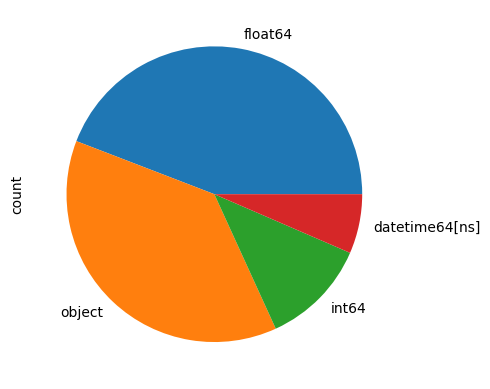

In [ ]:
df.dtypes.value_counts().plot.pie()

<Axes: >

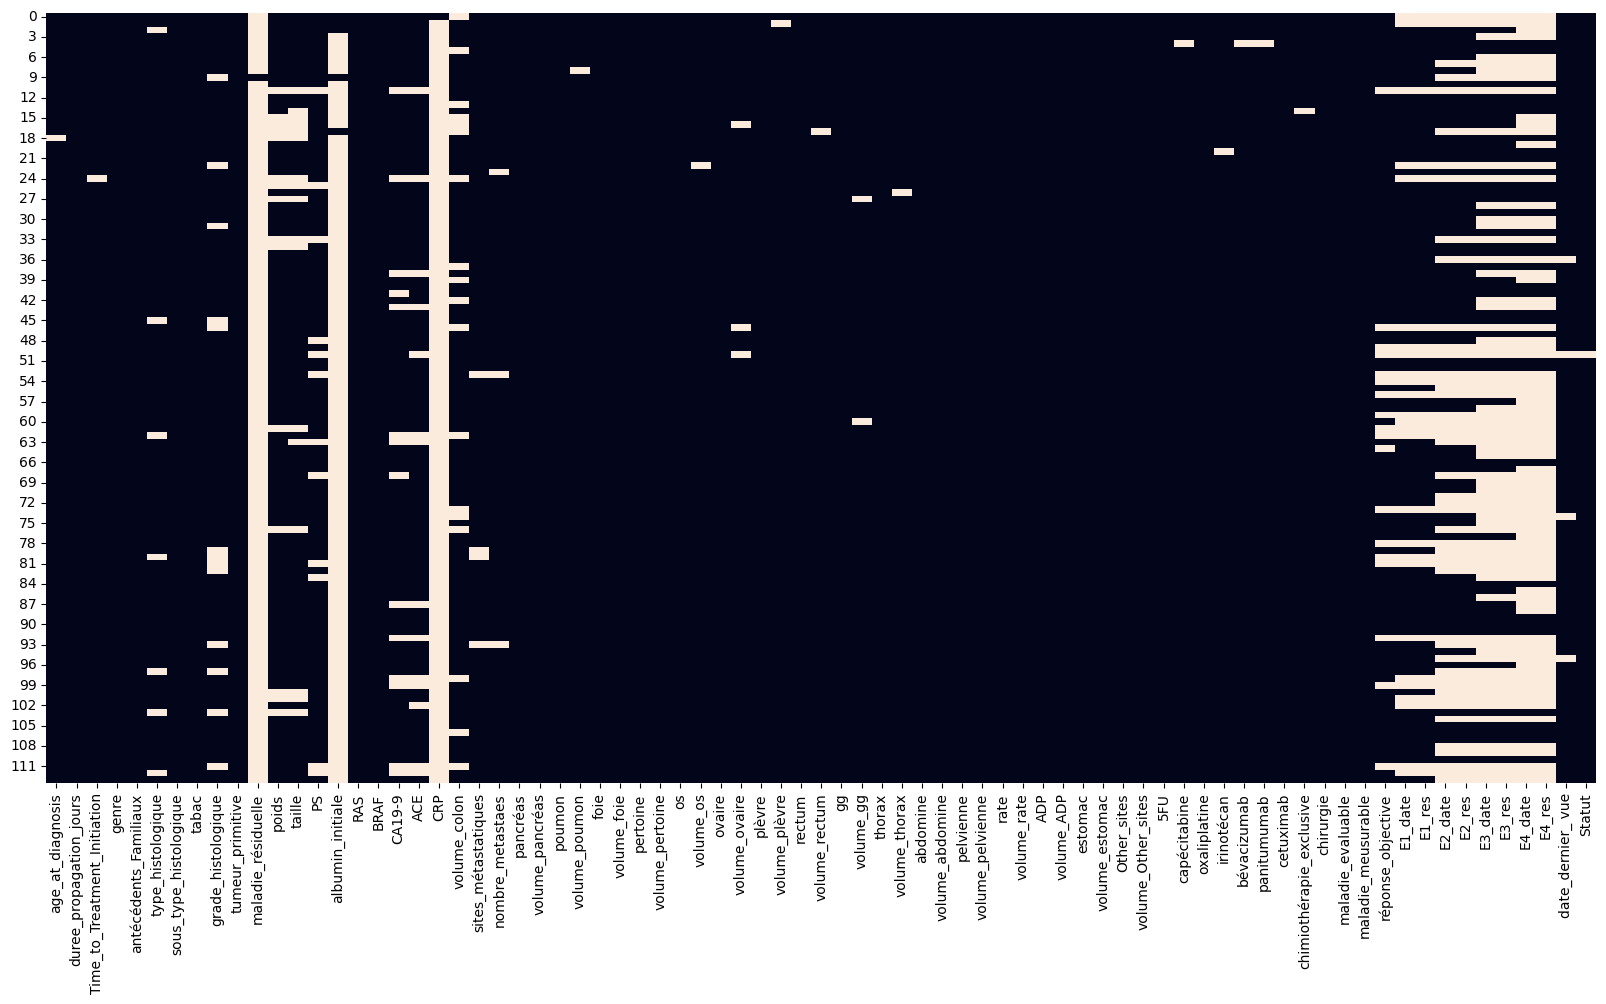

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)



In [ ]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)


duree_propagation_jours         0.000000
genre                           0.000000
sous_type_histologique          0.000000
antécédents_Familiaux           0.000000
tabac                           0.000000
tumeur_primitive                0.000000
RAS                             0.000000
os                              0.000000
volume_pancréas                 0.000000
poumon                          0.000000
foie                            0.000000
volume_foie                     0.000000
volume_pertoine                 0.000000
pertoine                        0.000000
pancréas                        0.000000
BRAF                            0.000000
volume_rate                     0.000000
ADP                             0.000000
volume_ADP                      0.000000
estomac                         0.000000
volume_estomac                  0.000000
Other_sites                     0.000000
rate                            0.000000
volume_pelvienne                0.000000
thorax                          0.000000
abdomine                        0.000000
pelvienne                       0.000000
volume_abdomine                 0.000000
rectum                          0.000000
gg                              0.000000
plèvre                          0.000000
ovaire                          0.000000
oxaliplatine                    0.000000
cetuximab                       0.000000
chirurgie                       0.000000
5FU                             0.000000
volume_Other_sites              0.000000
maladie_evaluable               0.000000
maladie_meusurable              0.000000
volume_os                       0.008772
bévacizumab                     0.008772
irinotécan                      0.008772
volume_rectum                   0.008772
capécitabine                    0.008772
panitumumab                     0.008772
Time_to_Treatment_Initiation    0.008772
volume_plèvre                   0.008772
volume_thorax                   0.008772
chimiothérapie_exclusive        0.008772
Statut                          0.008772
volume_poumon                   0.008772
age_at_diagnosis                0.008772
volume_gg                       0.017544
nombre_metastaes                0.026316
volume_ovaire                   0.026316
sites_métastatiques             0.035088
date_dernier_ vue               0.035088
type_histologique               0.061404
PS                              0.105263
grade_histologique              0.114035
CA19-9                          0.122807
ACE                             0.122807
poids                           0.131579
taille                          0.149123
réponse_objective               0.157895
volume_colon                    0.157895
E1_res                          0.228070
E1_date                         0.228070
E2_res                          0.412281
E2_date                         0.412281
E3_res                          0.587719
E3_date                         0.587719
E4_res                          0.692982
E4_date                         0.692982
albumin_initiale                0.956140
CRP                             0.991228
maladie_résiduelle              0.991228
dtype: float64

## Substantive Analysis

### Initial Visualization – Removal of Unnecessary Columns

⛳Drop all columns with more than 90% missing (NaN) values.

In [ ]:
df = df[df.columns[df.isna().sum()/df.shape[0] <0.9]]
df.head()

age_at_diagnosis  duree_propagation_jours  Time_to_Treatment_Initiation  \
0              84.0                       21                          24.0   
1              78.0                       61                          45.0   
2              67.0                        0                          13.0   
3              75.0                       35                           2.0   
4              76.0                      134                          79.0   

  genre  antécédents_Familiaux type_histologique  \
0  male                      0               adk   
1  male                      0               adk   
2  male                      0               NaN   
3  male                      0               adk   
4  male                      0               adk   

                sous_type_histologique  tabac grade_histologique  \
0                                Other      0   Bien différencié   
1  Adenocarcinoma (type Lieberkühnien)      0   Bien différencié   
2                                Other      0   Bien différencié   
3                                Other      1   Bien différencié   
4                                Other      1   Bien différencié   

  tumeur_primitive  poids  taille   PS        RAS      BRAF   CA19-9      ACE  \
0            Colon   60.0    1.70  1.0       Muté  Non muté    40.51     5.49   
1            Colon   60.0    1.62  0.0    Inconnu   Inconnu    17.23     2.28   
2            Colon   53.0    1.60  1.0       Muté   Inconnu    24.80     1.28   
3            Colon   45.0    1.54  1.0    Inconnu   Inconnu    18.10     6.80   
4            Colon   50.0    1.50  1.0  Non mutée   Inconnu  3840.00  2040.00   

   volume_colon   sites_métastatiques  nombre_metastaes pancréas  \
0           NaN             péritoine               1.0   absent   
1  23750.440461                  foie               1.0   absent   
2  18661.060362                    gg               1.0   absent   
3    523.598776  rectum. prostate. gg               2.0   absent   
4  33222.342312                  foie               1.0   absent   

   volume_pancréas  poumon  volume_poumon      foie   volume_foie pertoine  \
0              0.0  absent            0.0    absent  0.000000e+00   unique   
1              0.0  absent            0.0    unique  1.436755e+03   absent   
2              0.0  absent            0.0    absent  0.000000e+00   absent   
3              0.0  absent            0.0    absent  0.000000e+00   absent   
4              0.0  absent            0.0  multiple  4.239239e+07   absent   

   volume_pertoine      os  volume_os  ovaire  volume_ovaire  plèvre  \
0     11494.040322  absent        0.0  absent            0.0  absent   
1         0.000000  absent        0.0  absent            0.0  absent   
2         0.000000  absent        0.0  absent            0.0  absent   
3         0.000000  absent        0.0  absent            0.0  absent   
4         0.000000  absent        0.0  absent            0.0  absent   

   volume_plèvre    rectum  volume_rectum        gg     volume_gg  thorax  \
0            0.0    absent       0.000000    absent      0.000000  absent   
1            NaN    absent       0.000000    absent      0.000000  absent   
2            0.0    absent       0.000000    unique   3053.628059  absent   
3            0.0  multiple   51516.621732  multiple  26521.848780  absent   
4            0.0    absent       0.000000    absent      0.000000  absent   

   volume_thorax abdomine  volume_abdomine pelvienne  volume_pelvienne  \
0            0.0   absent              0.0    absent               0.0   
1            0.0   absent              0.0    absent               0.0   
2            0.0   absent              0.0    absent               0.0   
3            0.0   absent              0.0    absent               0.0   
4            0.0   absent              0.0    absent               0.0   

     rate  volume_rate     ADP  volume_ADP estomac  volume_estomac  \
0  absent          0.0  absent      

<Axes: >

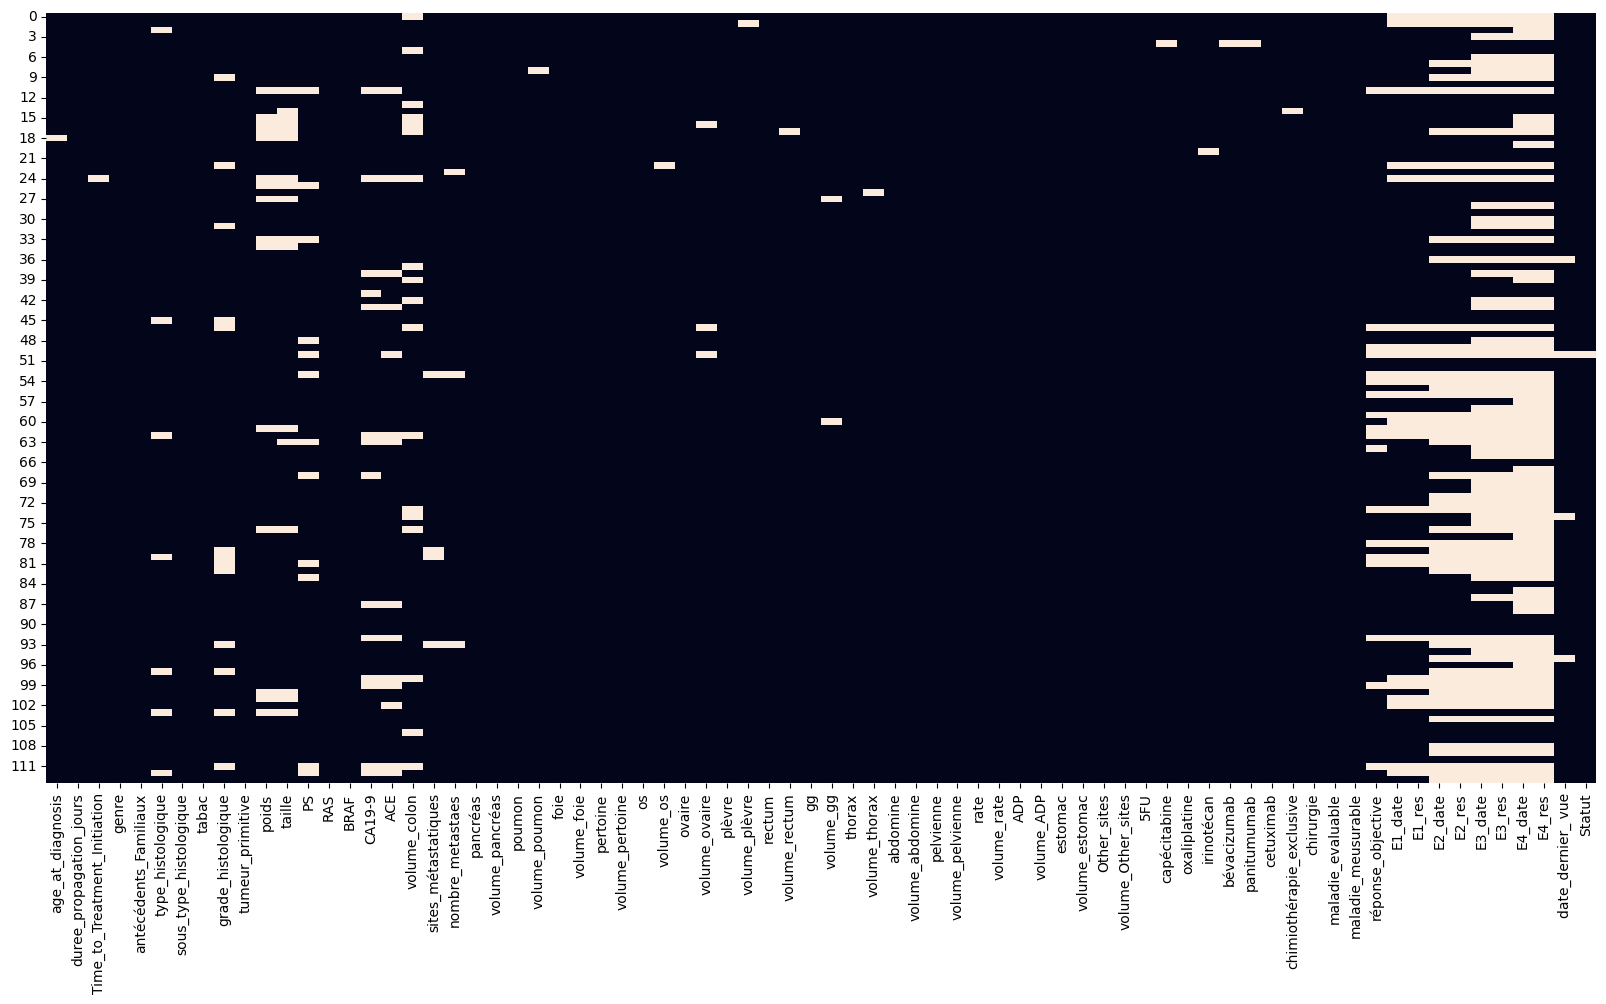

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [ ]:
df.shape

(114, 74)

In [ ]:
df.columns

Index(['age_at_diagnosis', 'duree_propagation_jours',
       'Time_to_Treatment_Initiation', 'genre', 'antécédents_Familiaux',
       'type_histologique', 'sous_type_histologique', 'tabac',
       'grade_histologique', 'tumeur_primitive', 'poids', 'taille', 'PS',
       'RAS', 'BRAF', 'CA19-9', 'ACE', 'volume_colon', 'sites_métastatiques',
       'nombre_metastaes', 'pancréas', 'volume_pancréas', 'poumon',
       'volume_poumon', 'foie', 'volume_foie', 'pertoine', 'volume_pertoine',
       'os', 'volume_os', 'ovaire', 'volume_ovaire', 'plèvre', 'volume_plèvre',
       'rectum', 'volume_rectum', 'gg', 'volume_gg', 'thorax', 'volume_thorax',
       'abdomine', 'volume_abdomine', 'pelvienne', 'volume_pelvienne', 'rate',
       'volume_rate', 'ADP', 'volume_ADP', 'estomac', 'volume_estomac',
       'Other_sites', 'volume_Other_sites', '5FU', 'capécitabine',
       'oxaliplatine', 'irinotécan', 'bévacizumab', 'panitumumab', 'cetuximab',
       'chimiothérapie_exclusive', 'chirurgie', 'malad

#### Creating new variables

In [ ]:
df[['volume_colon','volume_pancréas','volume_poumon','volume_foie','volume_pertoine','volume_os','volume_ovaire','volume_plèvre','volume_rectum','volume_gg','volume_thorax','volume_abdomine','volume_pelvienne','volume_rate','volume_ADP','volume_estomac','volume_Other_sites']] = df[['volume_colon','volume_pancréas','volume_poumon','volume_foie','volume_pertoine','volume_os','volume_ovaire','volume_plèvre','volume_rectum','volume_gg','volume_thorax','volume_abdomine','volume_pelvienne','volume_rate','volume_ADP','volume_estomac','volume_Other_sites']].fillna(0)


In [ ]:
df['tumor_size_total'] = df[['volume_pancréas','volume_poumon','volume_foie','volume_pertoine','volume_os','volume_ovaire','volume_plèvre','volume_rectum','volume_gg','volume_thorax','volume_abdomine','volume_pelvienne','volume_rate','volume_ADP','volume_estomac','volume_Other_sites']].sum(axis=1)


In [ ]:
df.drop(columns=['volume_pancréas','volume_poumon','volume_foie','volume_pertoine','volume_os','volume_ovaire','volume_plèvre','volume_rectum','volume_gg','volume_thorax','volume_abdomine','volume_pelvienne','volume_rate','volume_ADP','volume_estomac','volume_Other_sites'], inplace=True)


In [ ]:
organ_cols = ['pancréas', 'poumon','foie','pertoine','os','ovaire','plèvre','rectum','gg','thorax','abdomine','pelvienne','rate','ADP','estomac','Other_sites']


In [ ]:
def summarize_organ(row):
    values = row[organ_cols].tolist()
    if 'multiple' in values:
        return 'multiple'
    elif 'oligio' in values:
        return 'oligio'
    elif 'unique' in values:
        return 'unique'
    else:
        return 'absent'

df['organ_status'] = df.apply(summarize_organ, axis=1)


In [ ]:
df.drop(columns=organ_cols, inplace=True)


#### Grouping feature by type






To simplify the analysis, we grouped the variables into four types: numerical, binary categorical, multiclass categorical, and date/time features.

In [ ]:
numerical_features = ['age_at_diagnosis','poids', 'taille','duree_propagation_jours','Time_to_Treatment_Initiation','nombre_metastaes','CA19-9','ACE','volume_colon','tumor_size_total']
binary_categorical_features = ['type_histologique','genre','antécédents_Familiaux','tabac','5FU', 'capécitabine','oxaliplatine', 'irinotécan', 'bévacizumab', 'panitumumab','cetuximab','chimiothérapie_exclusive', 'chirurgie', 'maladie_evaluable','maladie_meusurable', 'réponse_objective']
multiclass_categorica_features = ['sous_type_histologique','PS','grade_histologique','tumeur_primitive','RAS', 'BRAF','sites_métastatiques','E1_res','E2_res','E3_res','E4_res','Statut','organ_status']
datetime_features = ['E1_date','E2_date','E3_date','E4_date']

In [ ]:
len(numerical_features)

10

In [ ]:
len(binary_categorical_features)

16

In [ ]:
len(multiclass_categorica_features)

13

In [ ]:
len(datetime_features)

4

#### Examination of the Target Column





<Axes: xlabel='réponse_objective', ylabel='count'>

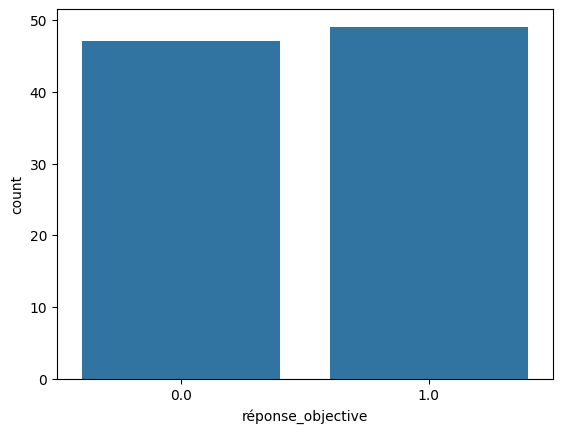

In [ ]:
sns.countplot(x='réponse_objective', data=df)

⛳We observed that the target variable is balanced

In [ ]:
df['réponse_objective'].value_counts(normalize=True)


réponse_objective
1.0    0.510417
0.0    0.489583
Name: proportion, dtype: float64

#### Histograms of Continuous Variables

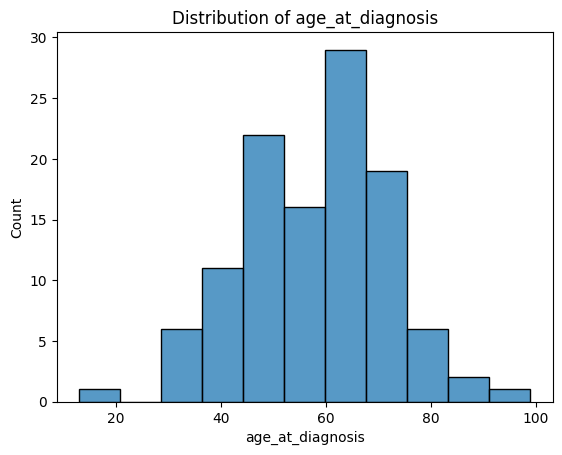

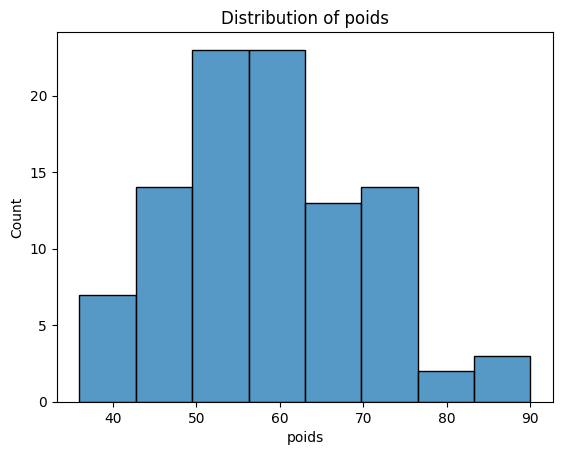

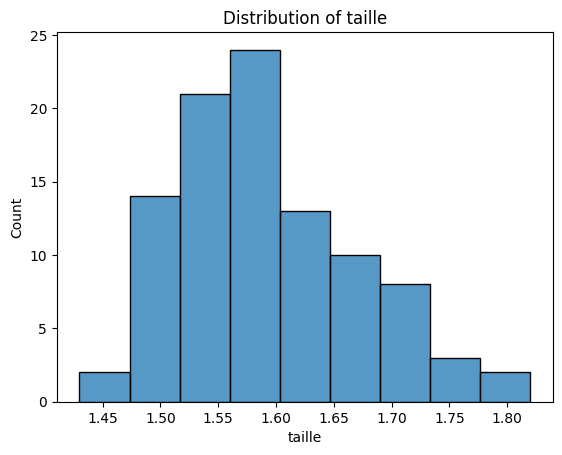

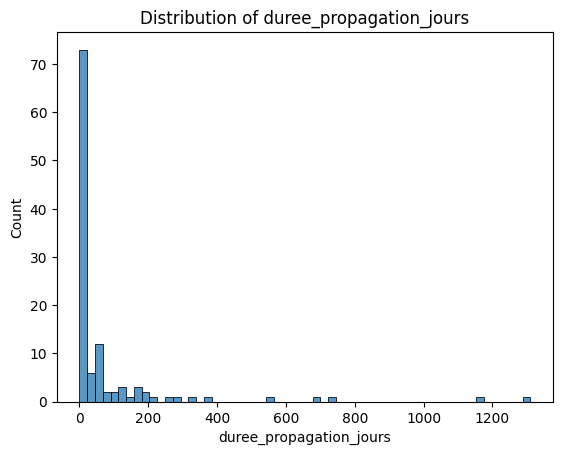

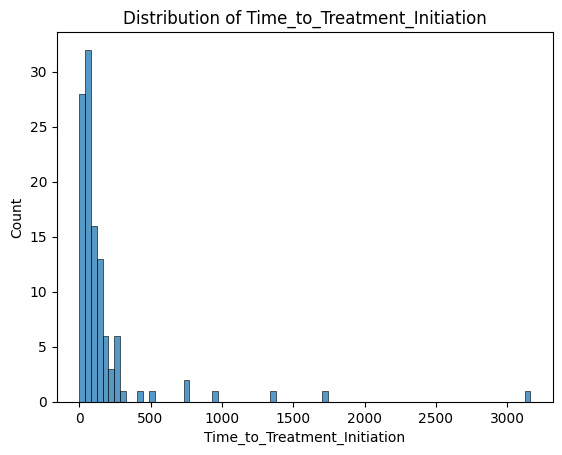

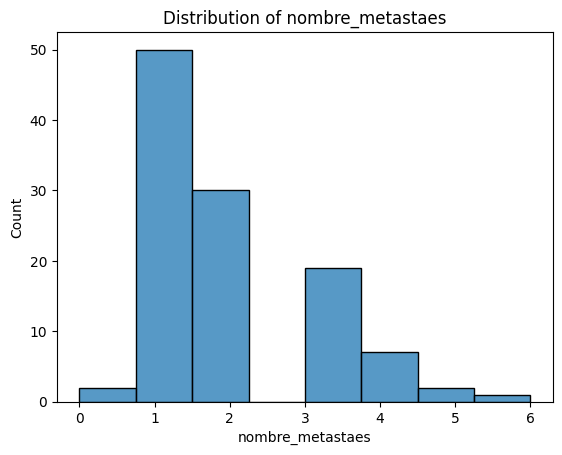

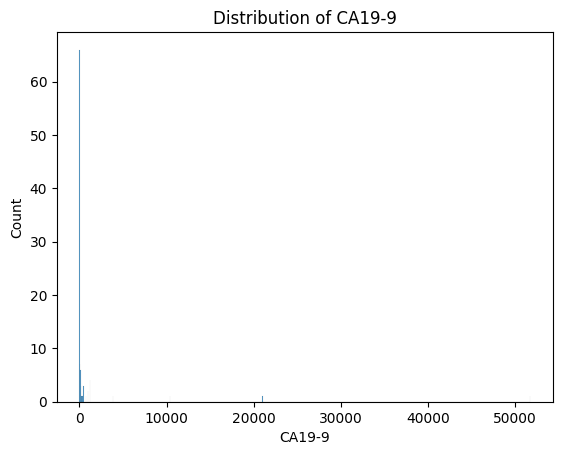

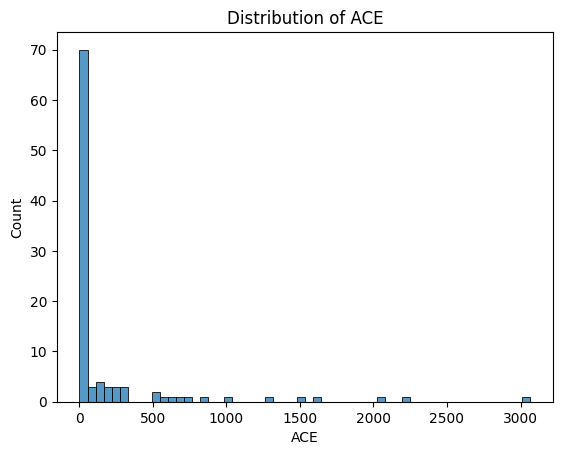

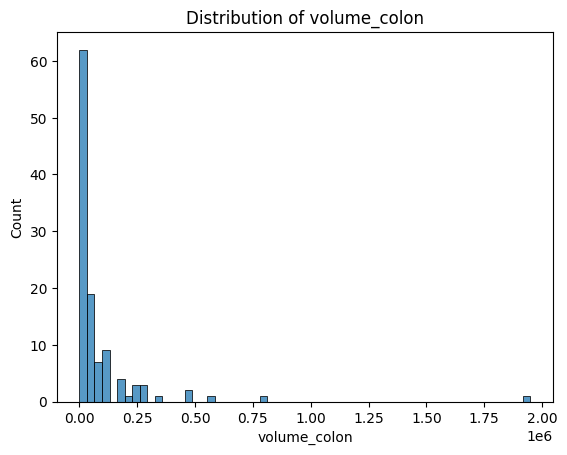

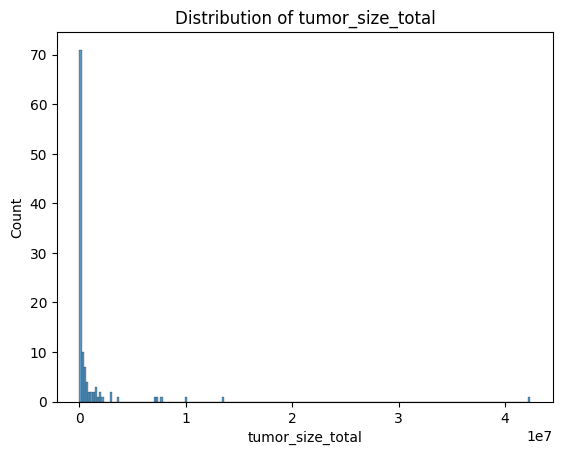

In [ ]:
for var in numerical_features:
    sns.histplot(data=df, x=var)
    plt.title(f"Distribution of {var}")
    plt.show()


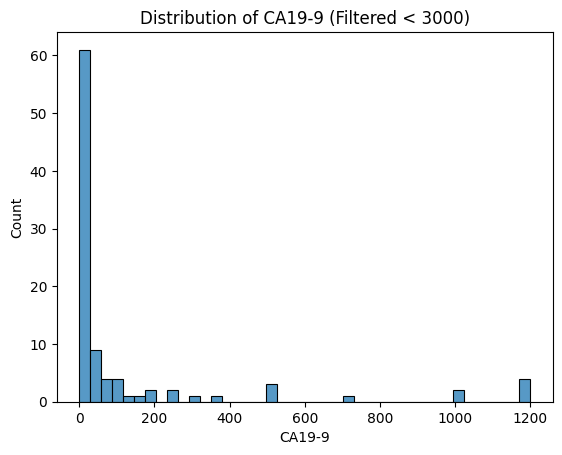

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

feature = 'CA19-9'

# تصفية البيانات من القيم المتطرفة
CA19_9 = df[df[feature] < 3000]

# الرسم بدون grid
sns.histplot(data=CA19_9, x=feature, kde=False)
plt.title(f"Distribution of {feature} (Filtered < 3000)")
plt.xlabel(feature)
plt.ylabel("Count")

# هذا السطر يزيل الخطوط الأفقية والعمودية
plt.grid(False)

plt.show()


<ipython-input-28-2296827680>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


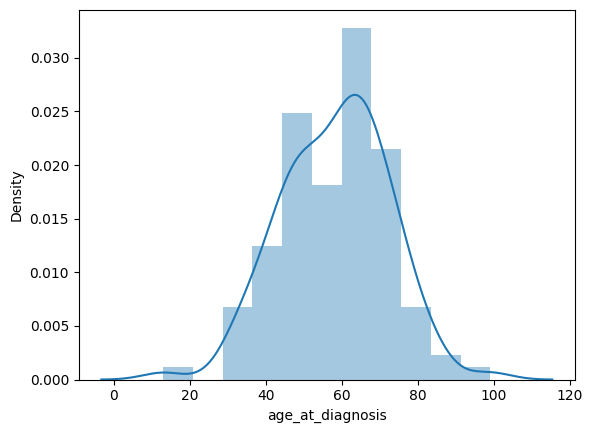

<ipython-input-28-2296827680>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


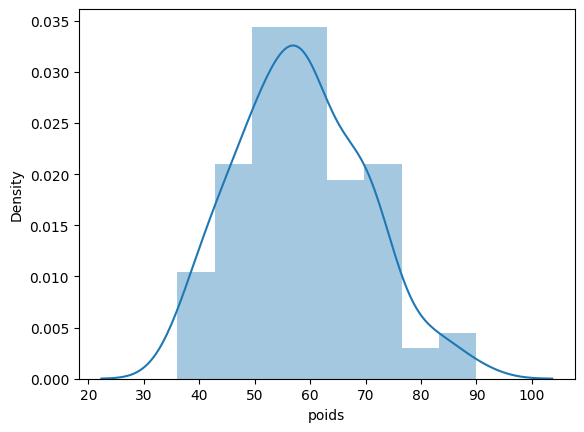

<ipython-input-28-2296827680>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


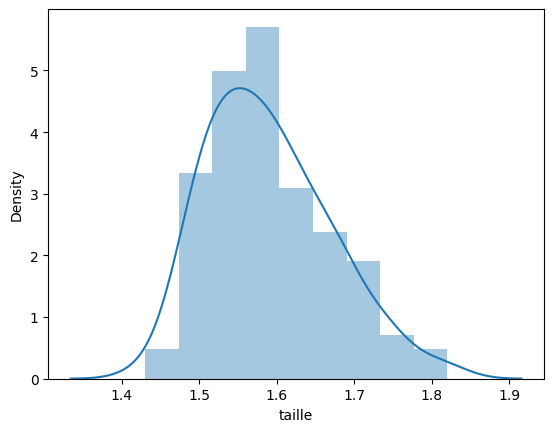

<ipython-input-28-2296827680>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


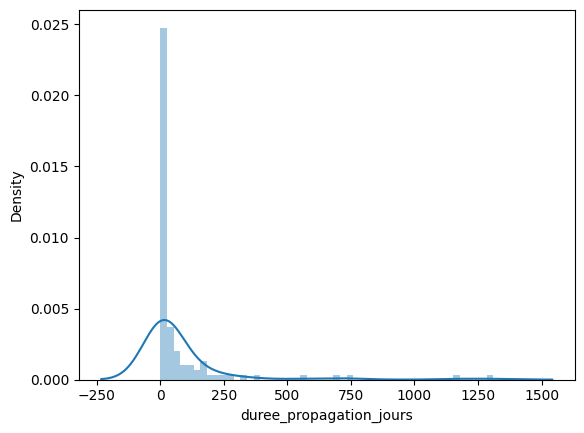

<ipython-input-28-2296827680>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


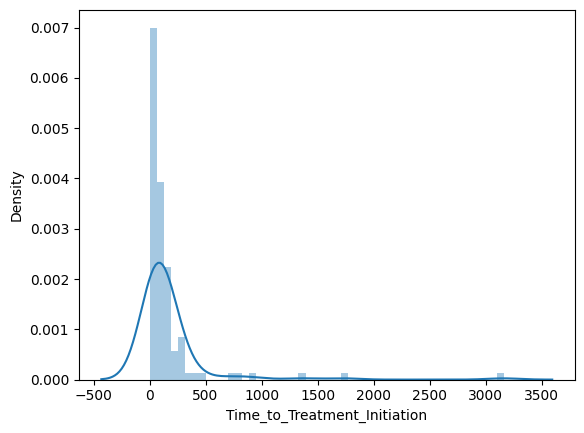

<ipython-input-28-2296827680>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


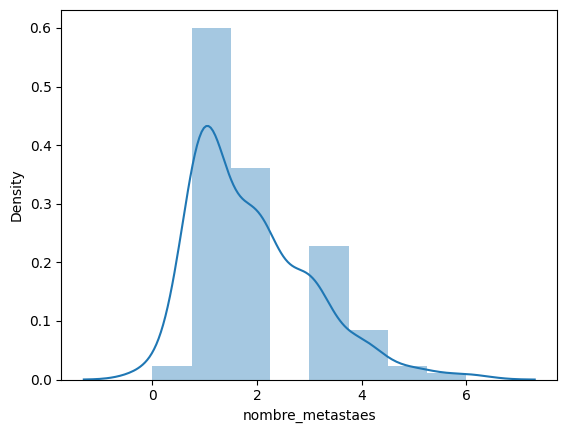

<ipython-input-28-2296827680>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


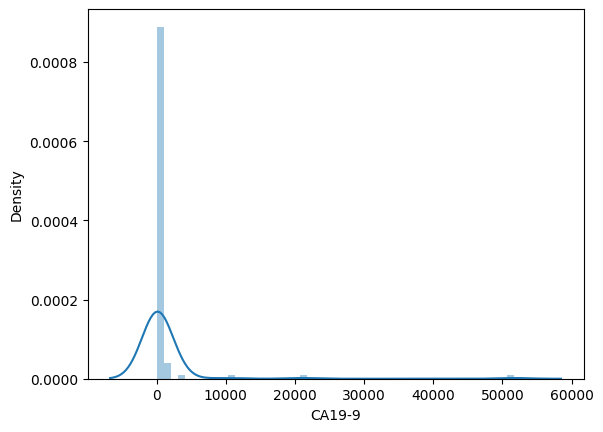

<ipython-input-28-2296827680>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


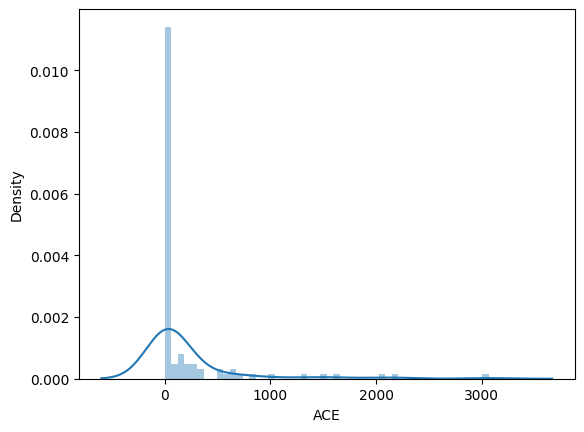

<ipython-input-28-2296827680>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


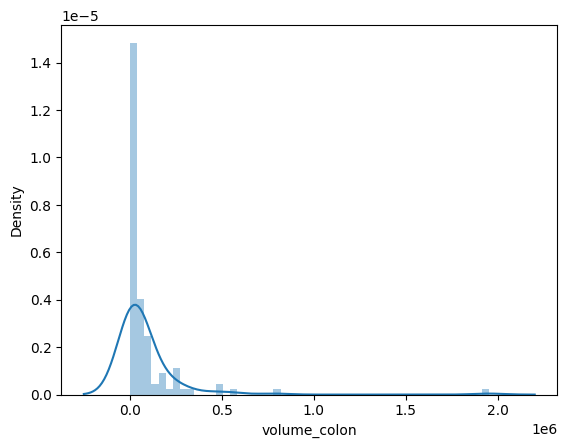

<ipython-input-28-2296827680>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


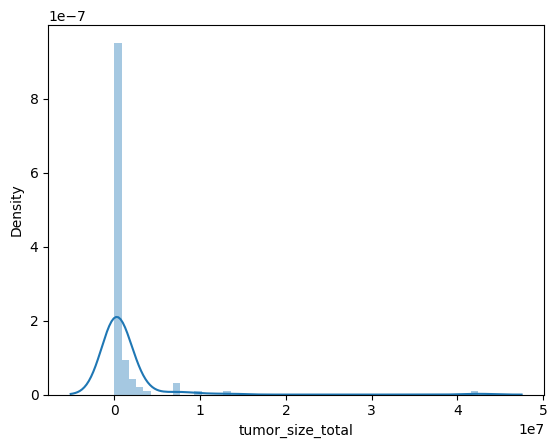

In [ ]:
for col in numerical_features:
    plt.figure()
    sns.distplot(df[col])
    plt.show()

⛳The dataset contains features with varying scales and units, as well as some outliers.


#### Binary Categorical Features

In [ ]:
for col in binary_categorical_features:
    print(f'{col :-<50} {df[col].unique()}')

type_histologique--------------------------------- ['adk' nan 'tne']
genre--------------------------------------------- ['male' 'femelle']
antécédents_Familiaux----------------------------- [0 1]
tabac--------------------------------------------- [0 1]
5FU----------------------------------------------- [1 0]
capécitabine-------------------------------------- [ 0.  1. nan]
oxaliplatine-------------------------------------- [0 1]
irinotécan---------------------------------------- [ 0.  1. nan]
bévacizumab--------------------------------------- [ 0.  1. nan]
panitumumab--------------------------------------- [ 0.  1. nan]
cetuximab----------------------------------------- [0 1]
chimiothérapie_exclusive-------------------------- [ 1.  0. nan]
chirurgie----------------------------------------- [0 1]
maladie_evaluable--------------------------------- [0 1]
maladie_meusurable-------------------------------- [0 1]
réponse_objective--------------------------------- [ 0.  1. nan]


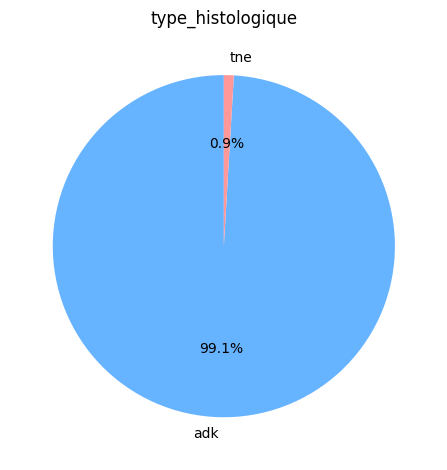

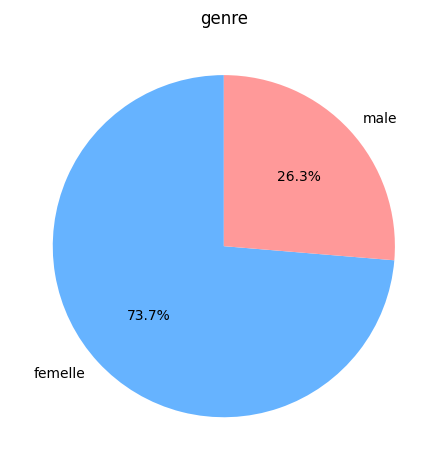

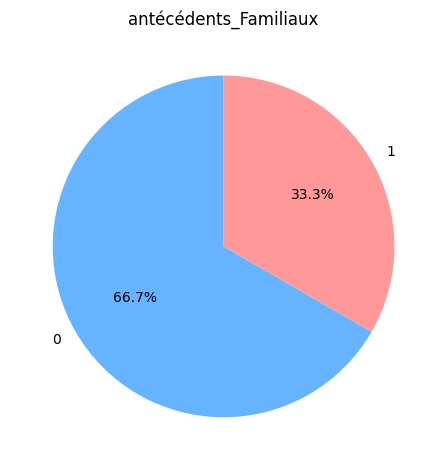

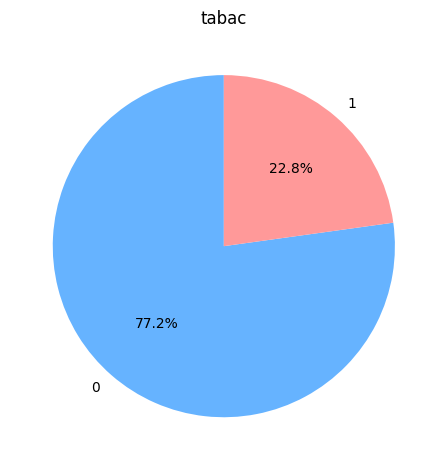

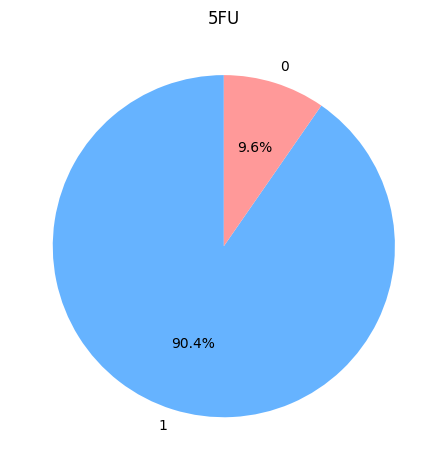

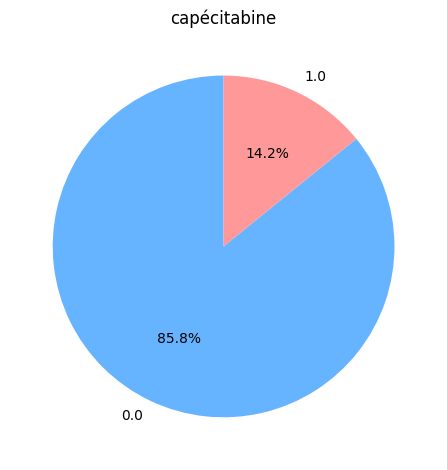

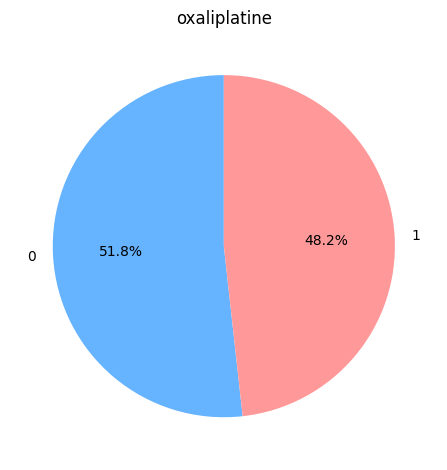

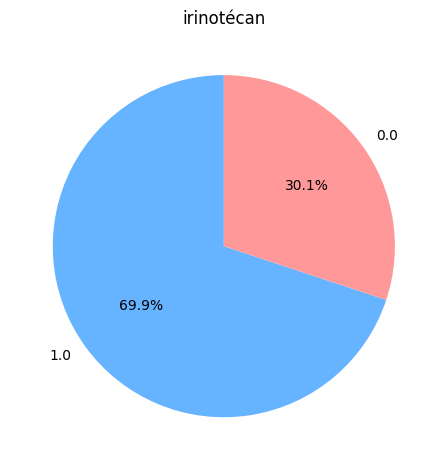

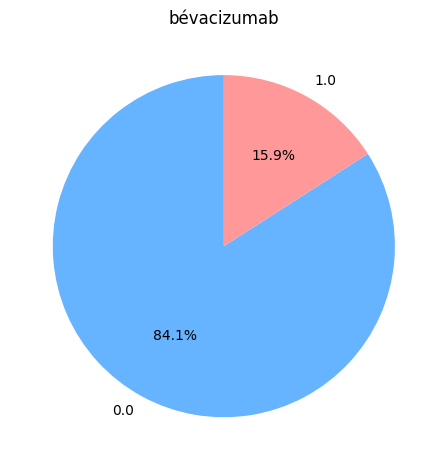

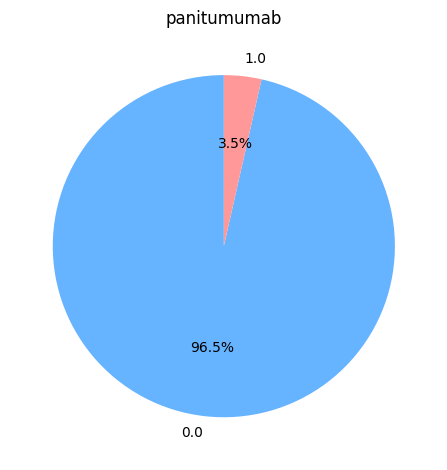

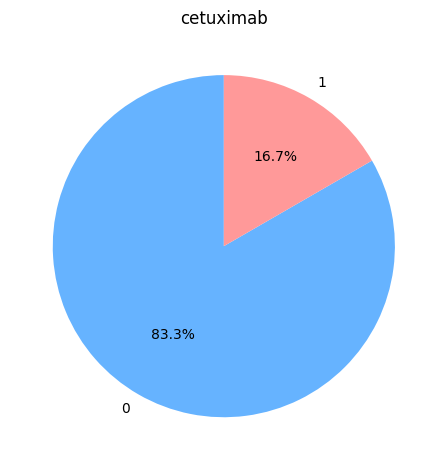

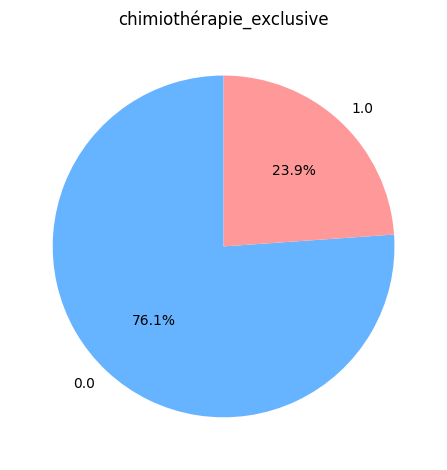

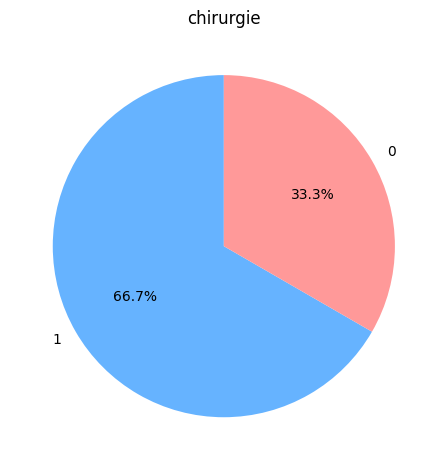

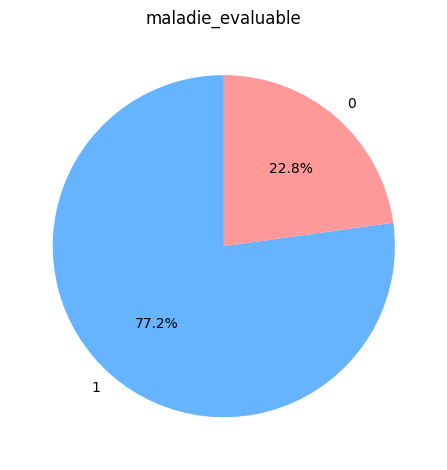

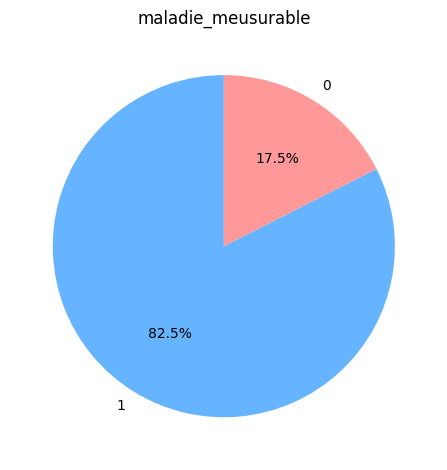

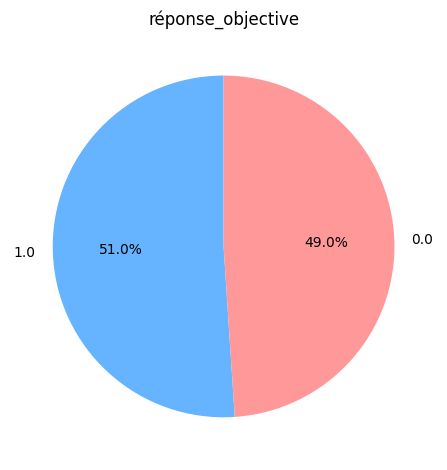

In [ ]:
for col in binary_categorical_features:
    plt.figure()
    df[col].value_counts().plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        colors=['#66b3ff', '#ff9999']
    )
    plt.title(col)
    plt.ylabel('')
    plt.tight_layout()
    plt.show()


#### multiclass categorica features

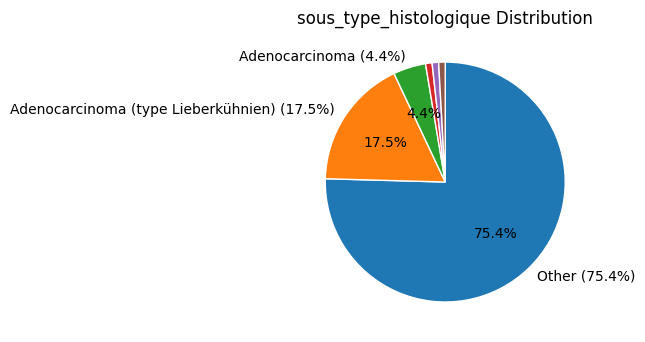

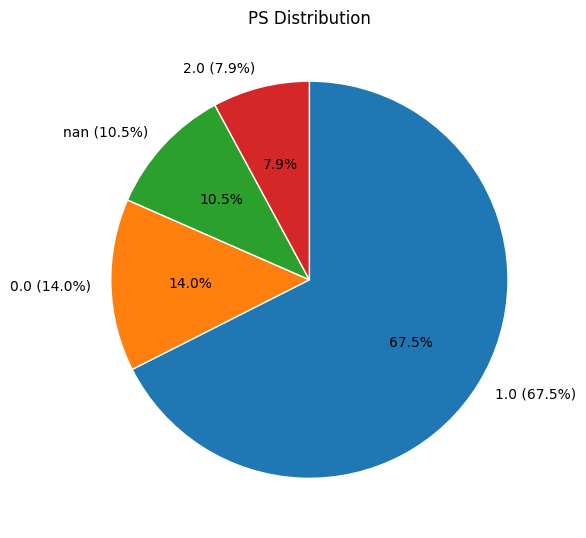

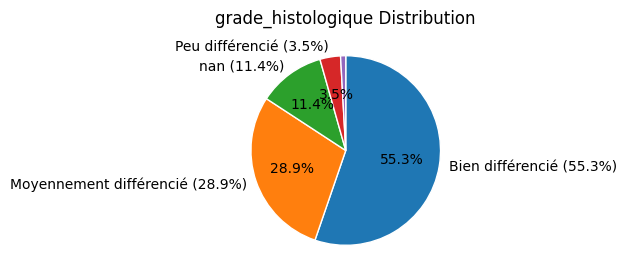

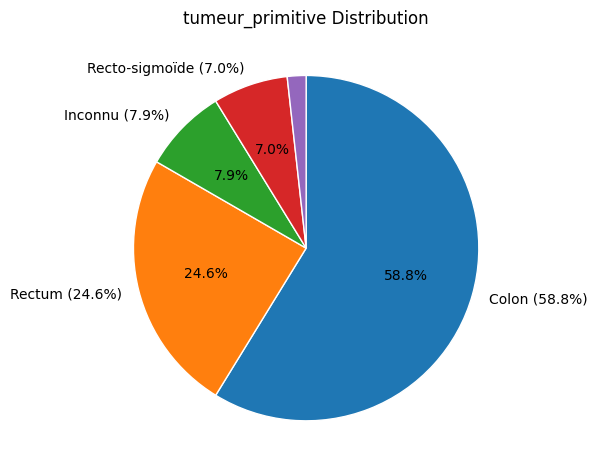

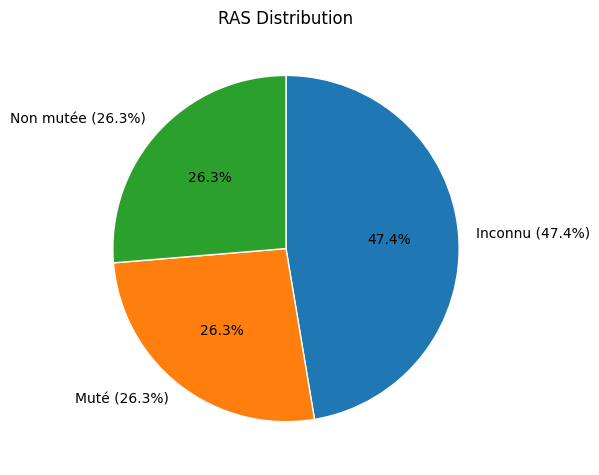

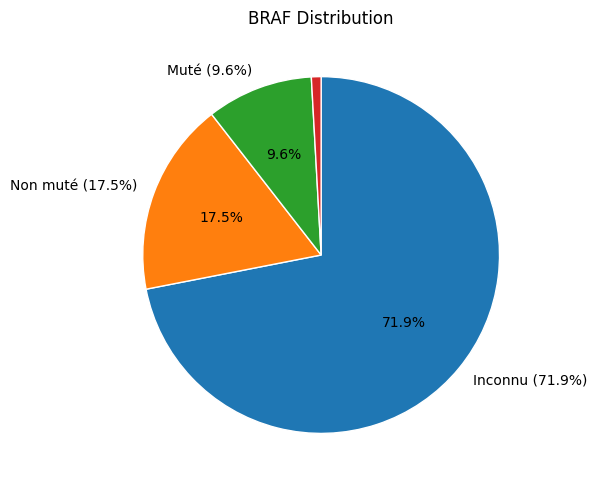

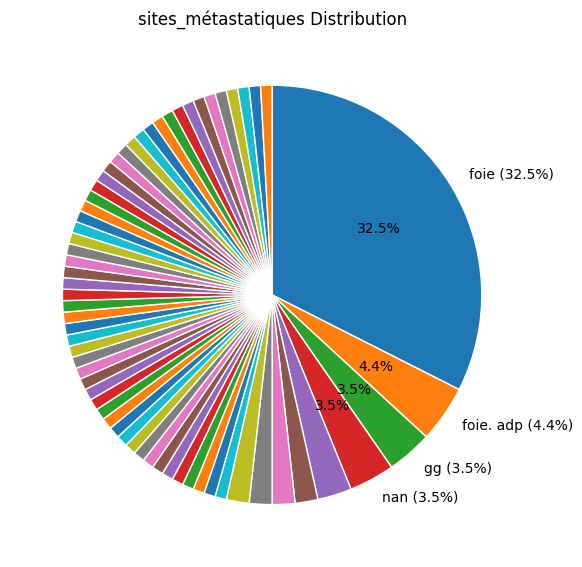

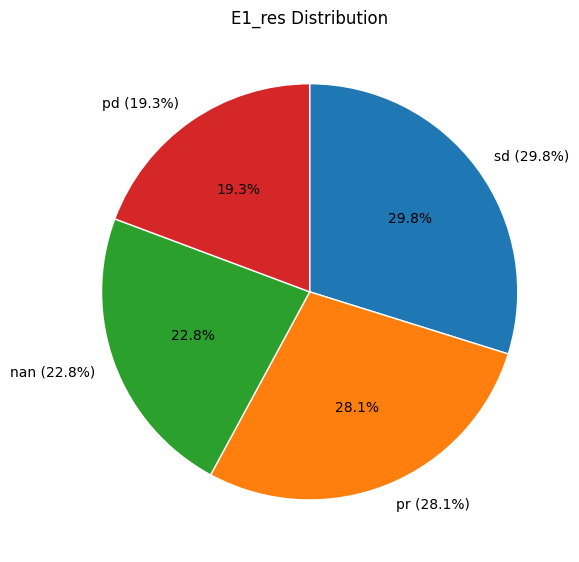

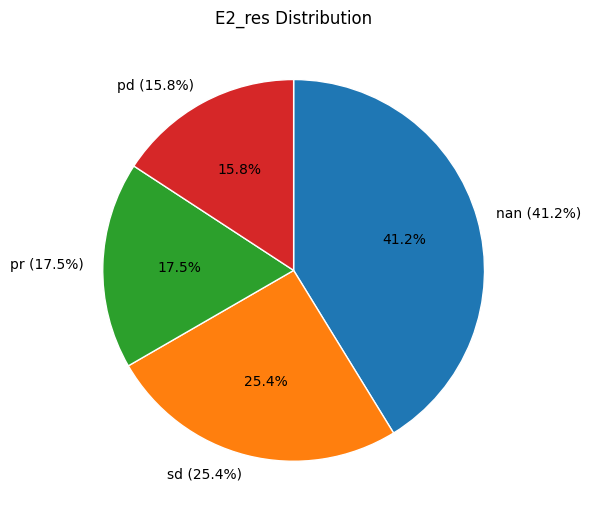

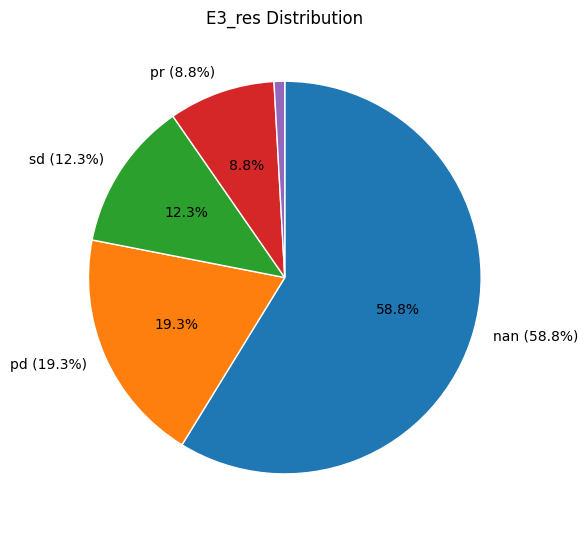

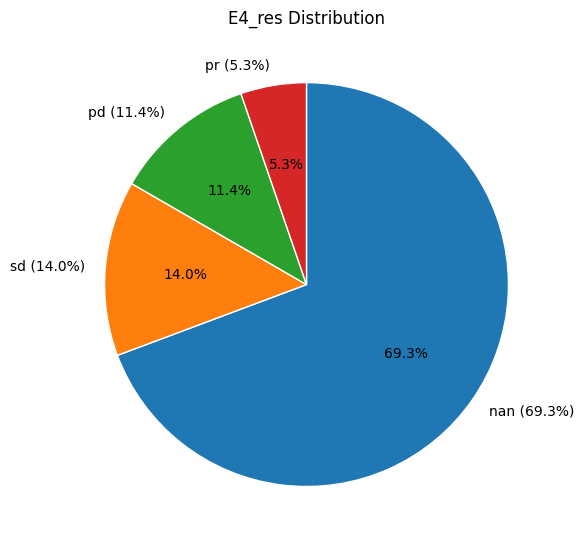

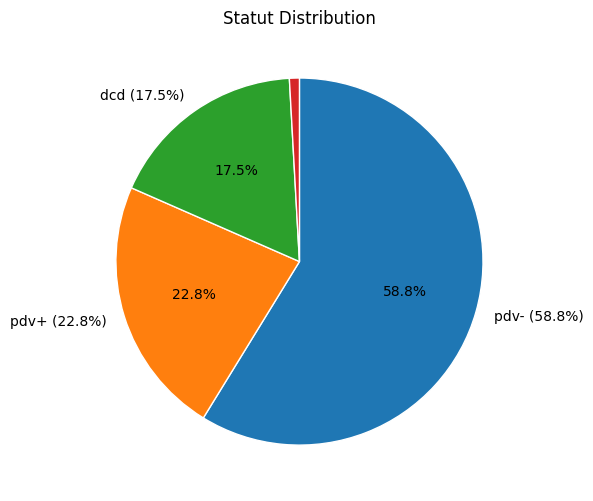

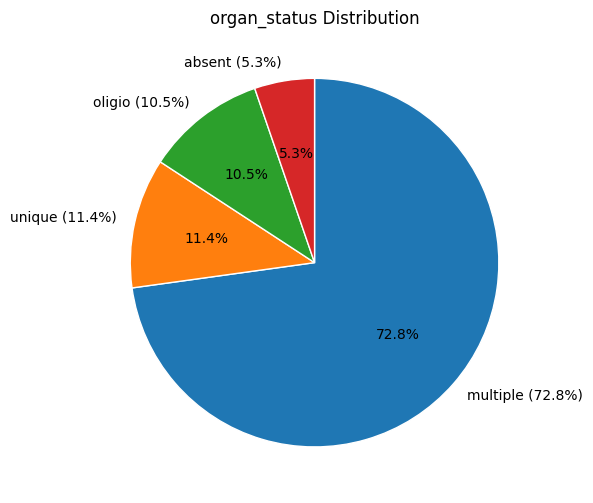

In [ ]:
import matplotlib.pyplot as plt


for col in multiclass_categorica_features:
    plt.figure(figsize=(6, 6))

    value_counts = df[col].value_counts(dropna=False)
    labels = value_counts.index
    sizes = value_counts.values
    percentages = sizes / sizes.sum() * 100


    threshold = 3  # %
    labels_cleaned = [
        f'{label} ({p:.1f}%)' if p >= threshold else ''
        for label, p in zip(labels, percentages)
    ]

    plt.pie(
        sizes,
        labels=labels_cleaned,
        autopct=lambda p: f'{p:.1f}%' if p >= threshold else '',
        startangle=90,
        counterclock=False,
        wedgeprops={'edgecolor': 'white'}
    )
    plt.title(f'{col} Distribution')
    plt.tight_layout()
    plt.show()


#### datetime_features

In [ ]:
evaluation_map = {'cr': 3, 'pr': 2, 'sd': 1, 'pd': 0}
label_map = {v: k for k, v in evaluation_map.items()}

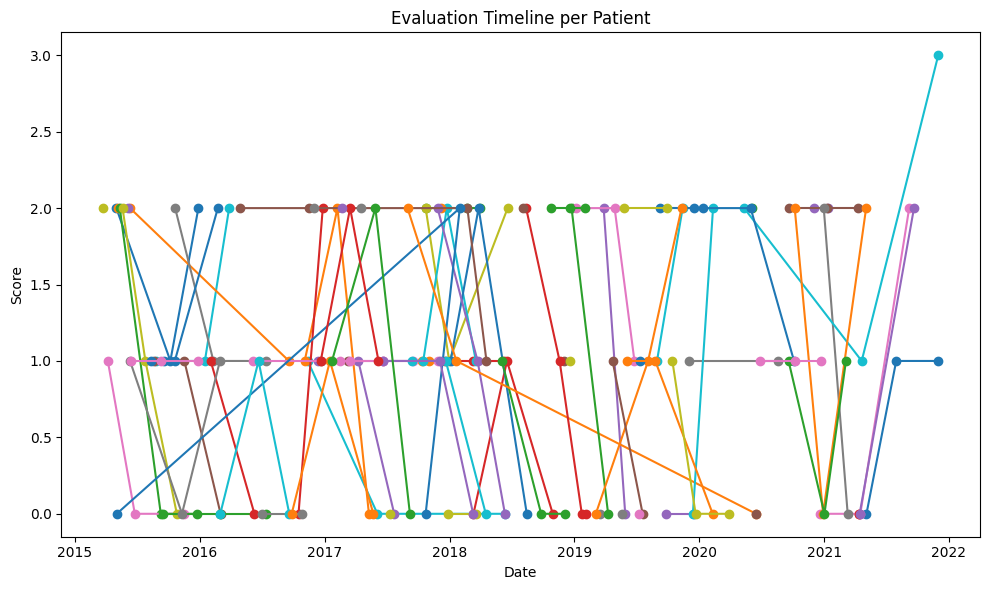

In [ ]:
plt.figure(figsize=(10, 6))

for idx, row in df.iterrows():
    dates = [row[f'E{i}_date'] for i in range(1, 4)]
    scores_raw = [row[f'E{i}_res'] for i in range(1, 4)]
    scores = [evaluation_map.get(s, None) for s in scores_raw]


    # Remove NaT values and corresponding scores
    valid_data = [(date, score) for date, score in zip(dates, scores) if pd.notnull(date)]
    valid_dates = [data[0] for data in valid_data]
    valid_scores = [data[1] for data in valid_data]

    if not valid_dates:  # Skip if no valid dates
        continue

    plt.plot(valid_dates, valid_scores, marker='o', label=f'Patient {idx+1}')  # Using row index as pseudo-ID

plt.title('Evaluation Timeline per Patient')
plt.xlabel('Date')
plt.ylabel('Score')
plt.tight_layout()

plt.show()

### Relationship Between Target and Variables


#### Creation of Positive and Negative Subsets


In [ ]:
positive_df = df[df['réponse_objective'] == 1]
negative_df = df[df['réponse_objective'] == 0]

#### Target / Continuous Variables

<ipython-input-35-459119258>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_df[col], label='positive')
<ipython-input-35-459119258>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(negative_df[col], label='negative')
<ipython-input-35-459119258>:3: UserWarning: 

`distplot` is a depre

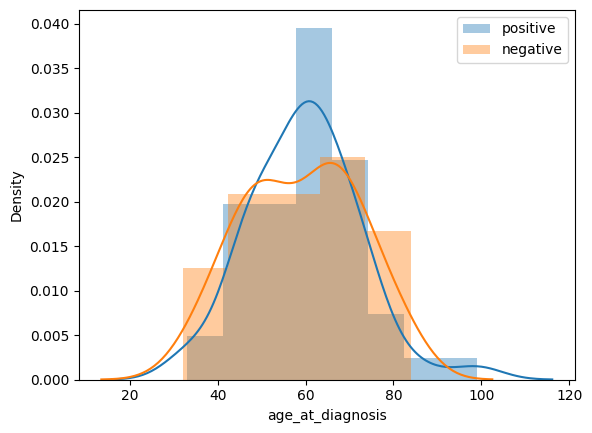

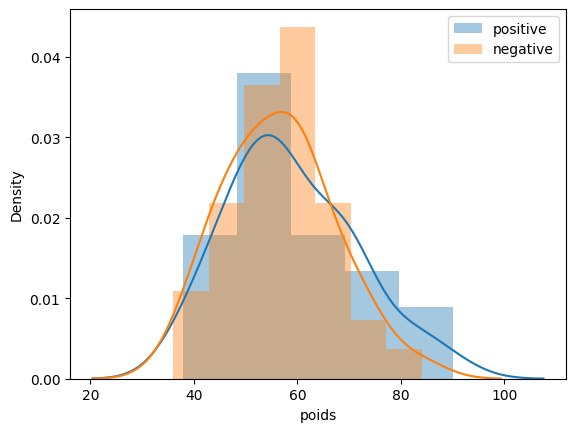

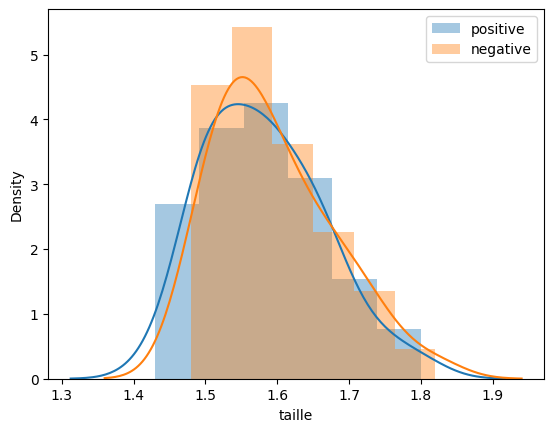

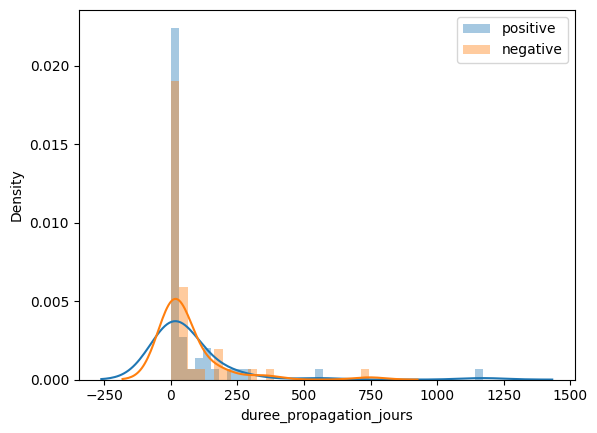

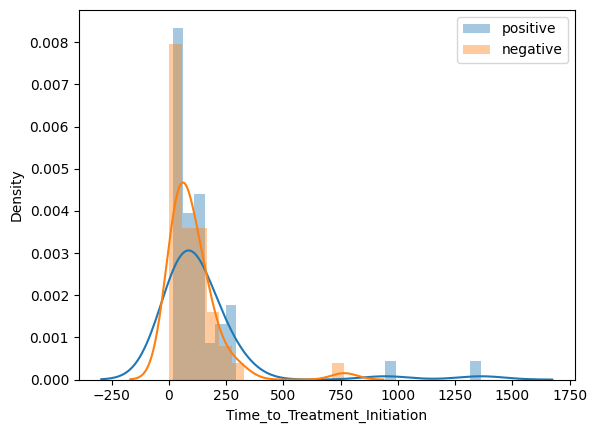

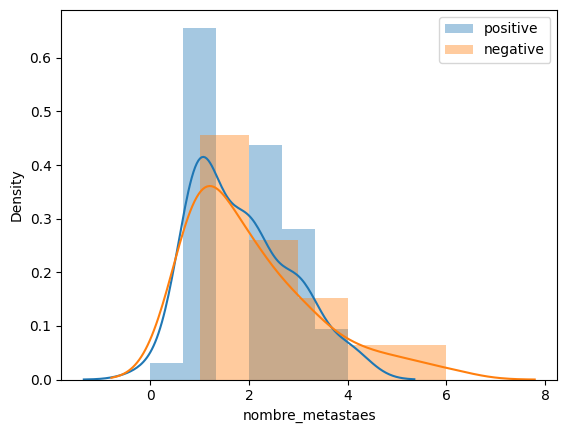

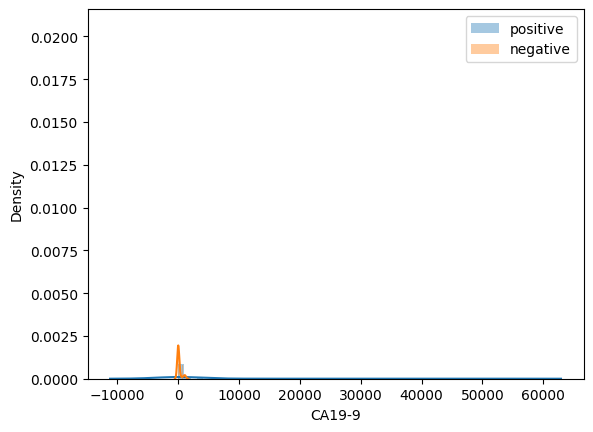

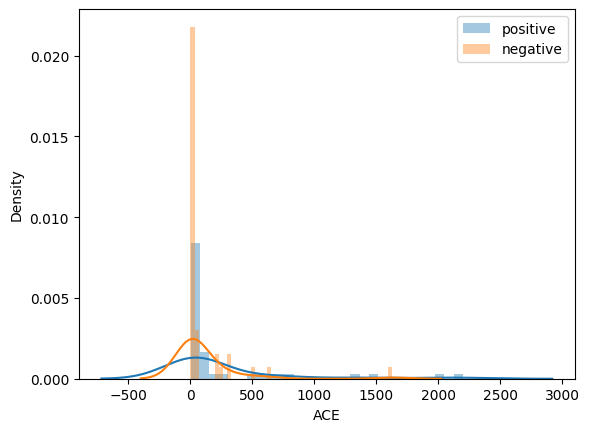

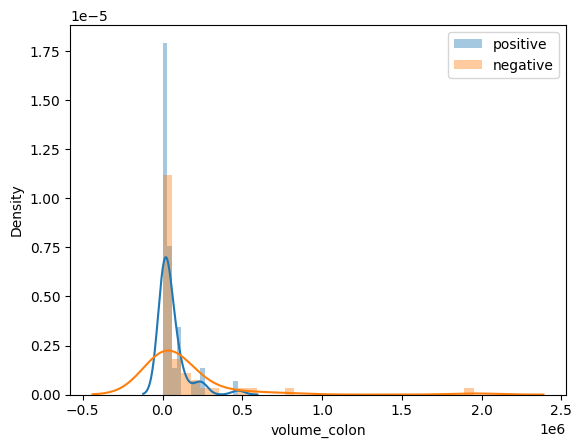

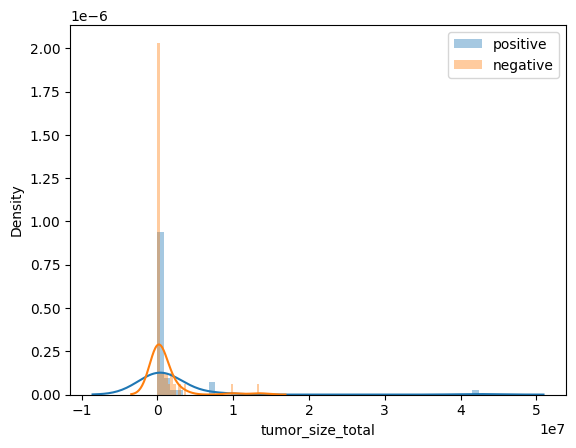

In [ ]:
for col in numerical_features:
    plt.figure()
    sns.distplot(positive_df[col], label='positive')
    sns.distplot(negative_df[col], label='negative')
    plt.legend()

#### Target / binary categorical features

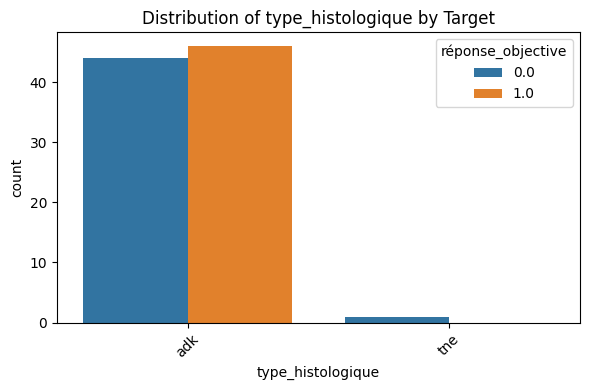

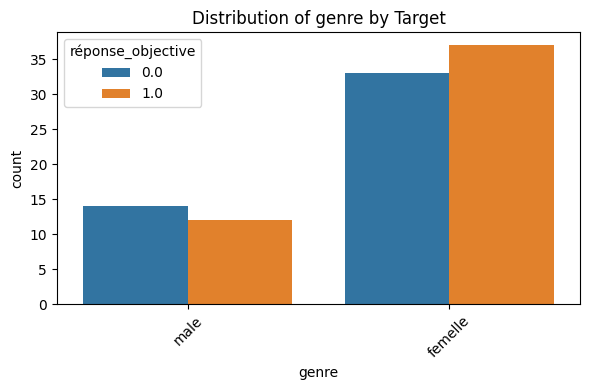

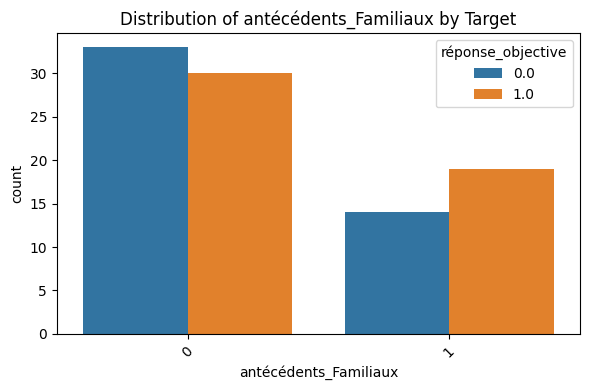

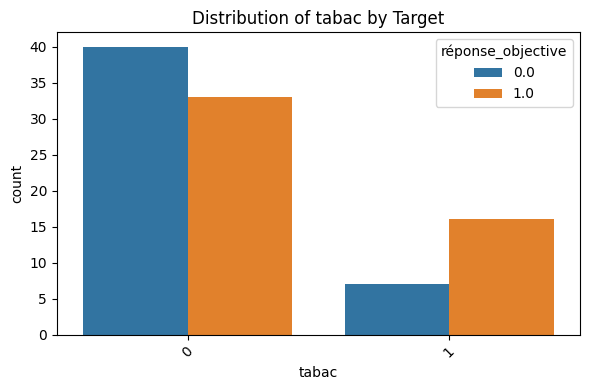

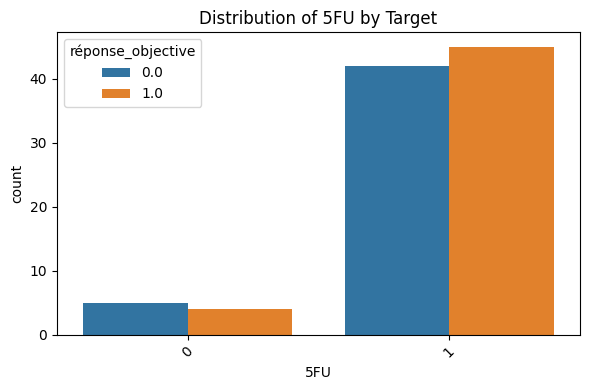

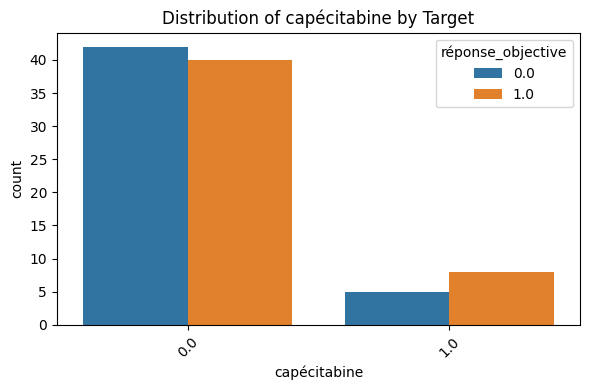

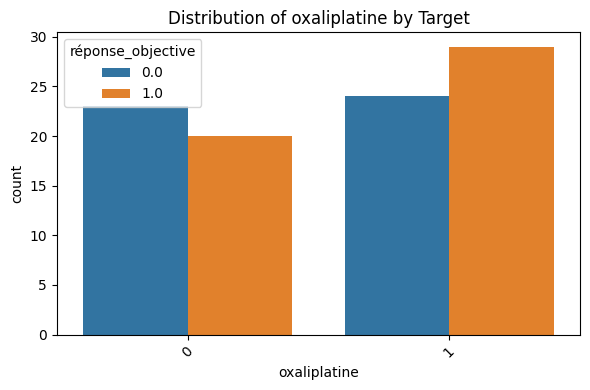

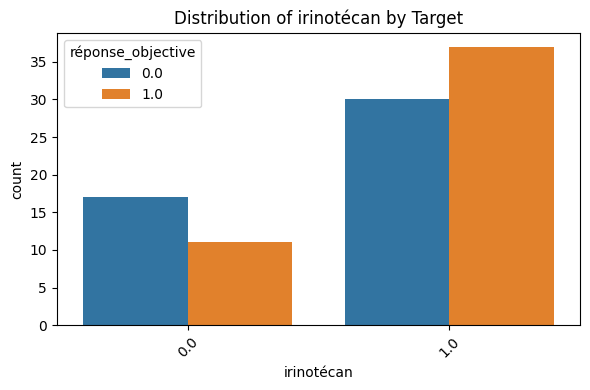

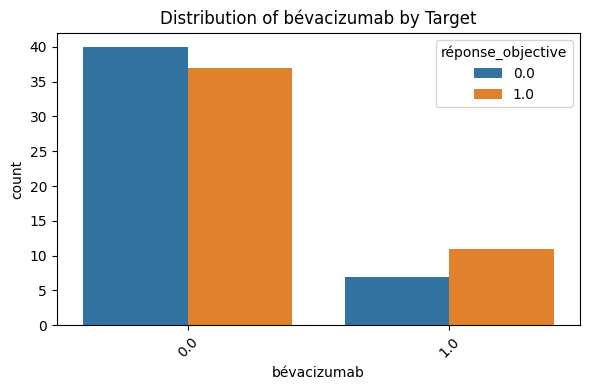

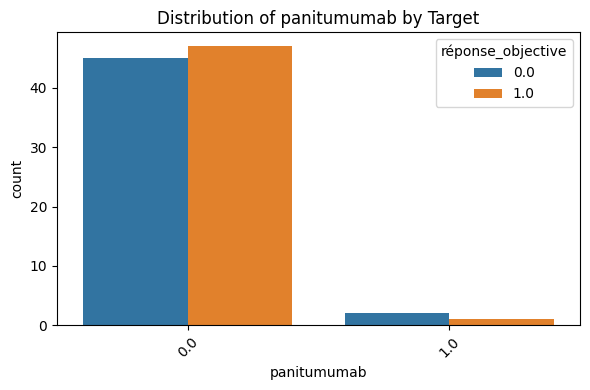

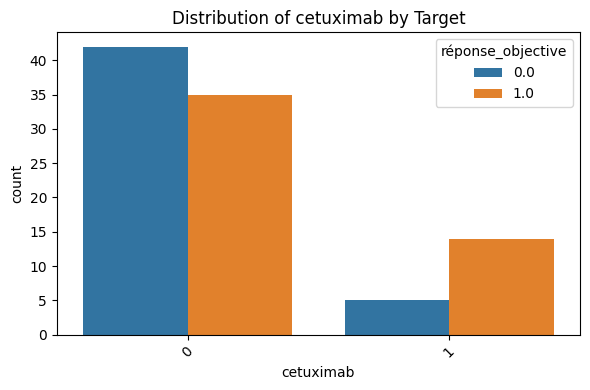

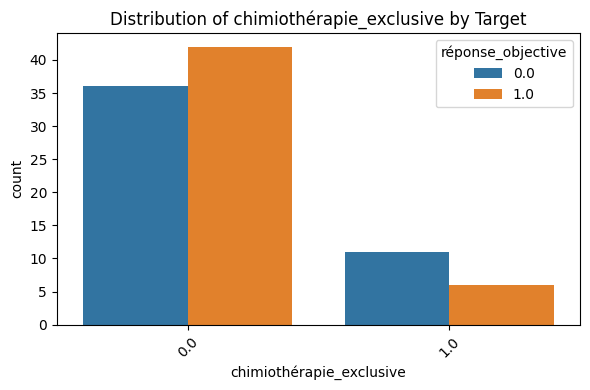

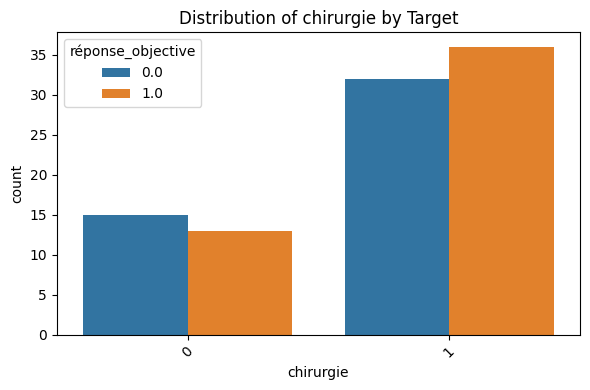

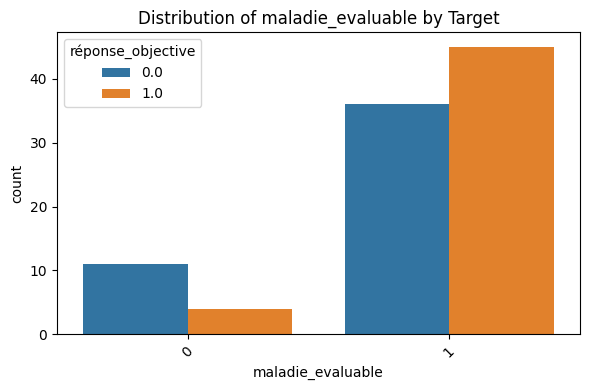

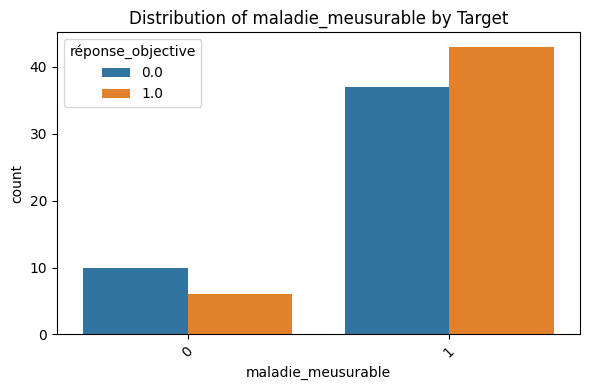

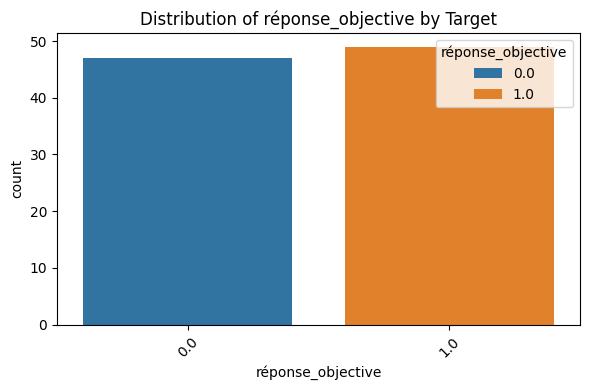

In [ ]:
for var in binary_categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=var, hue='réponse_objective')
    plt.title(f'Distribution of {var} by Target')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#### Target / multiclass categorica features

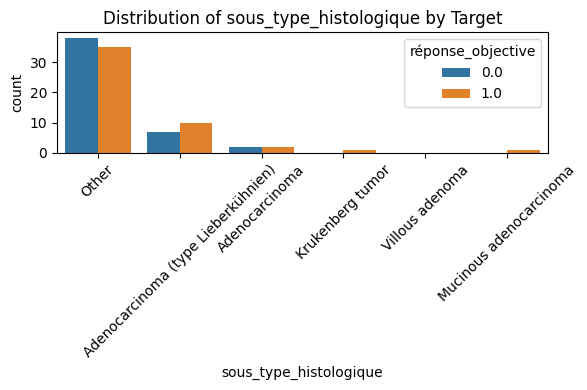

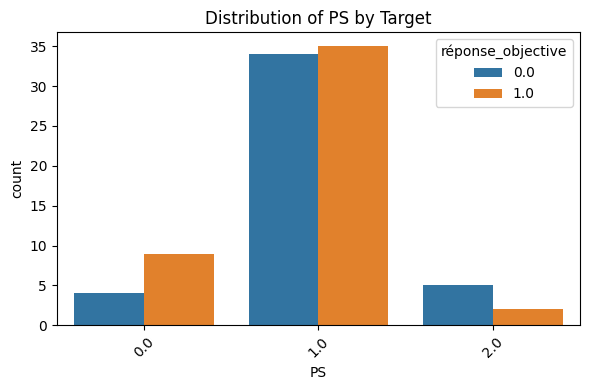

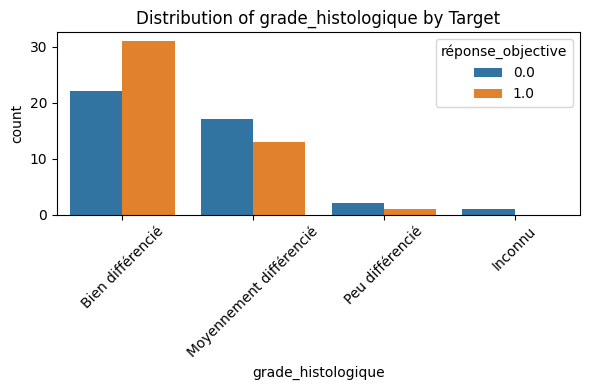

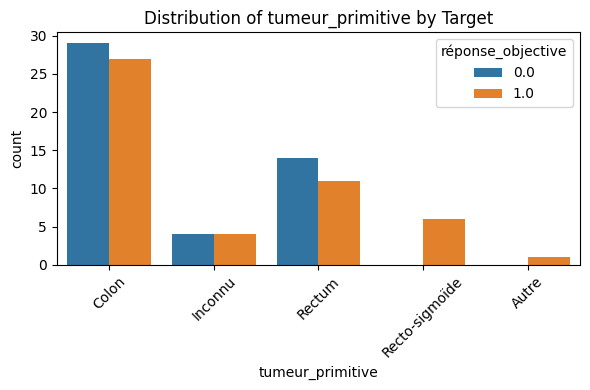

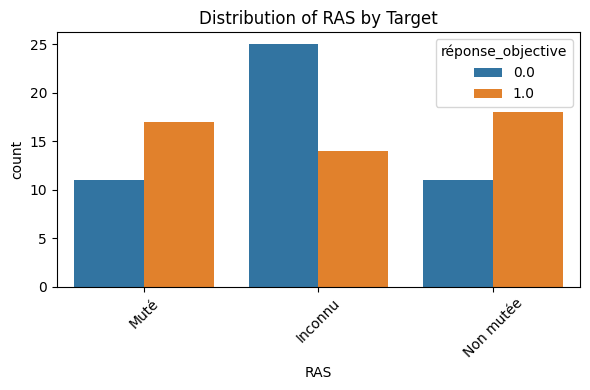

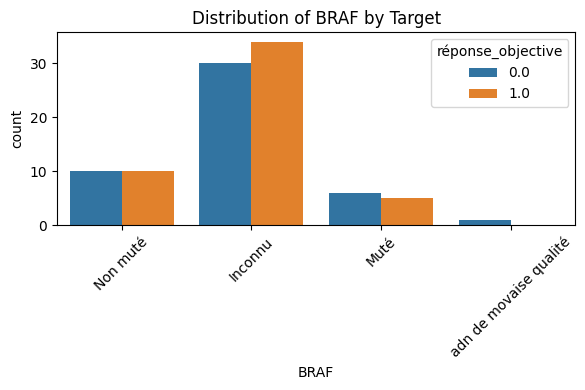

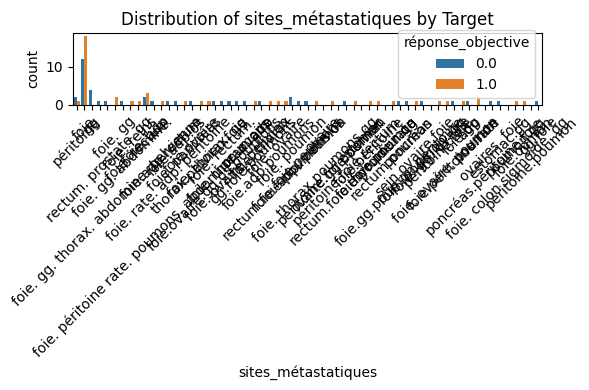

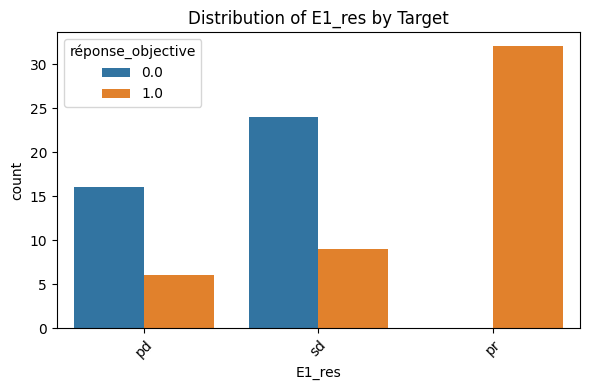

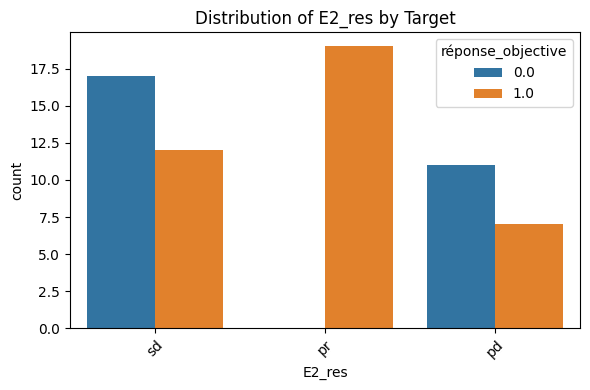

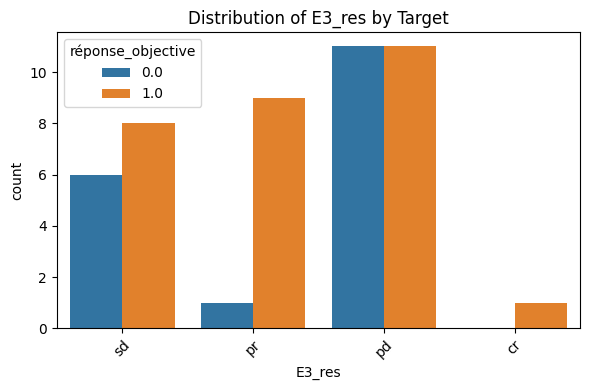

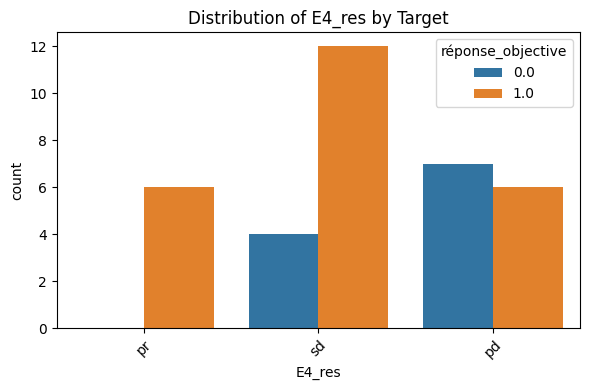

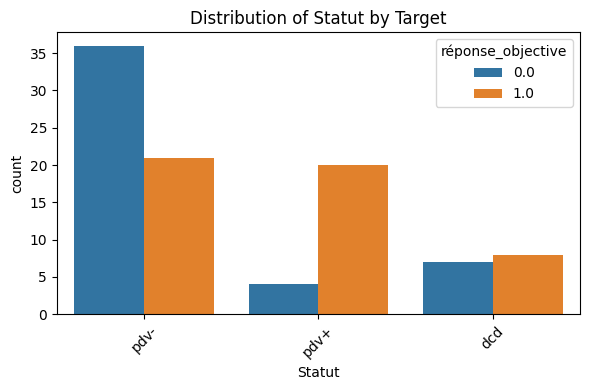

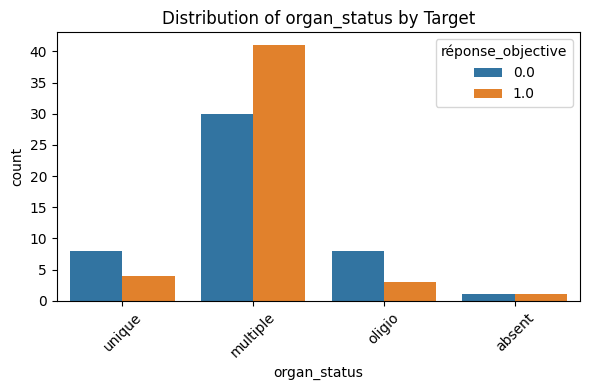

In [ ]:
for var in multiclass_categorica_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=var, hue='réponse_objective')
    plt.title(f'Distribution of {var} by Target')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#### Target / datetime features

In [ ]:
df['diff_E1_E2'] = (pd.to_datetime(df['E2_date']) - pd.to_datetime(df['E1_date'])).dt.days

In [ ]:
df['diff_E2_E3'] = (pd.to_datetime(df['E3_date']) - pd.to_datetime(df['E2_date'])).dt.days

In [ ]:
df['diff_E3_E4'] = (pd.to_datetime(df['E4_date']) - pd.to_datetime(df['E3_date'])).dt.days

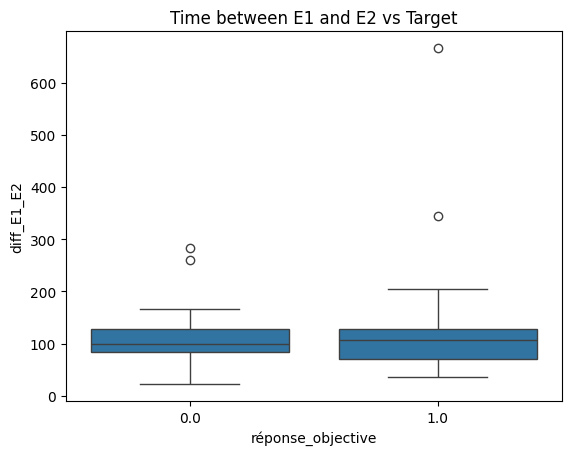

In [ ]:
sns.boxplot(x='réponse_objective', y='diff_E1_E2', data=df)
plt.title('Time between E1 and E2 vs Target')
plt.show()


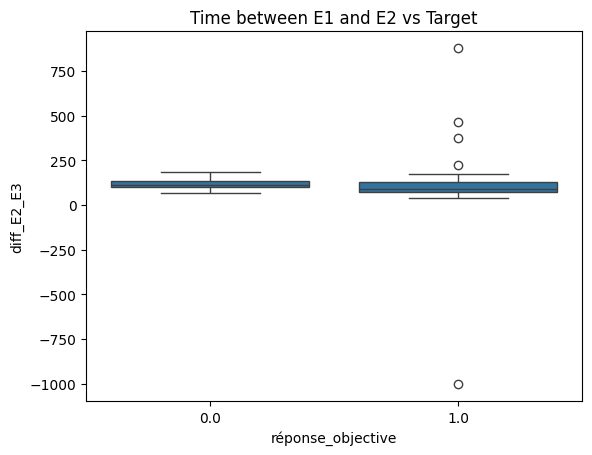

In [ ]:
sns.boxplot(x='réponse_objective', y='diff_E2_E3', data=df)
plt.title('Time between E1 and E2 vs Target')
plt.show()

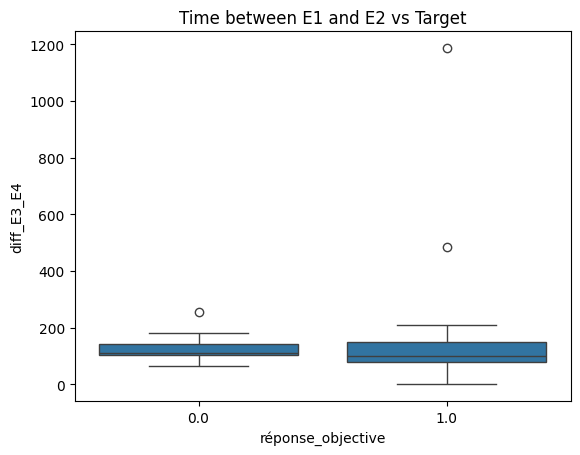

In [ ]:
sns.boxplot(x='réponse_objective', y='diff_E3_E4', data=df)
plt.title('Time between E1 and E2 vs Target')
plt.show()

In [ ]:
df.groupby('réponse_objective')['diff_E1_E2'].describe()

count        mean         std   min    25%    50%     75%  \
réponse_objective                                                              
0.0                 28.0  116.178571   54.195157  22.0  84.00   99.5  127.25   
1.0                 38.0  123.447368  104.910695  36.0  70.25  106.0  127.00   

                     max  
réponse_objective         
0.0                283.0  
1.0                666.0

In [ ]:
df.groupby('réponse_objective')['diff_E2_E3'].describe()

count        mean         std     min    25%    50%  \
réponse_objective                                                        
0.0                 18.0  118.500000   29.888518    69.0  99.75  114.0   
1.0                 29.0  109.482759  271.942434 -1004.0  71.00   92.0   

                      75%    max  
réponse_objective                 
0.0                134.75  185.0  
1.0                127.00  877.0

In [ ]:
df.groupby('réponse_objective')['diff_E3_E4'].describe()

count        mean         std   min     25%    50%    75%  \
réponse_objective                                                              
0.0                 11.0  126.909091   54.849712  63.0  102.00  112.0  143.0   
1.0                 24.0  164.416667  235.612046   0.0   79.75   98.5  149.5   

                      max  
réponse_objective          
0.0                 255.0  
1.0                1186.0

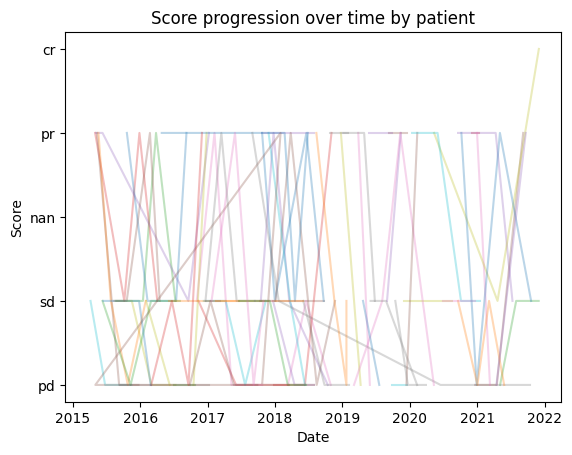

In [ ]:
for _, row in df.iterrows():
    dates = pd.to_datetime([row['E1_date'], row['E2_date'], row['E3_date'], row['E4_date']])
    scores = [row['E1_res'], row['E2_res'], row['E3_res'], row['E4_res']]
    plt.plot(dates, scores, alpha=0.3, label=row['réponse_objective'])

plt.title('Score progression over time by patient')
plt.xlabel('Date')
plt.ylabel('Score')
plt.show()


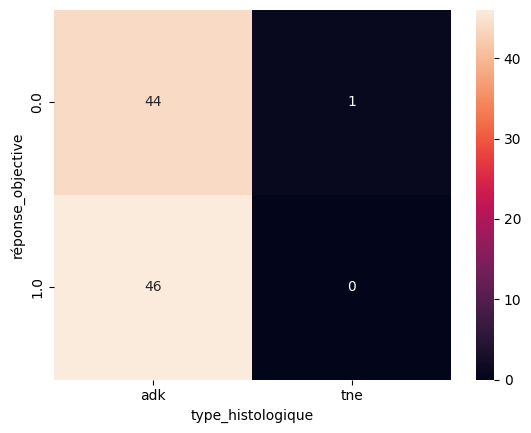

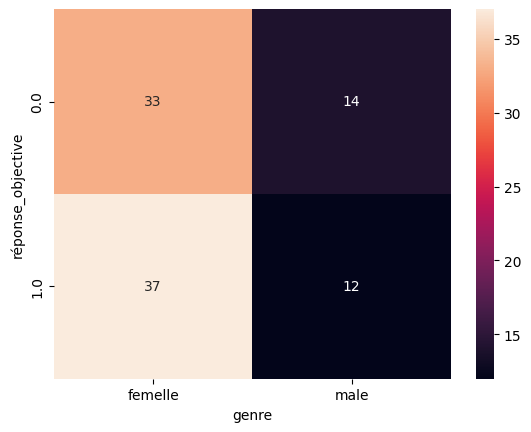

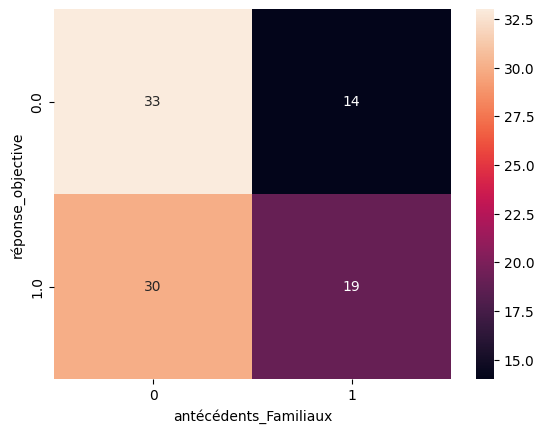

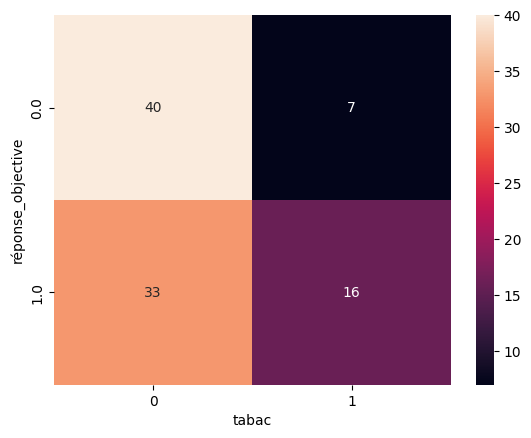

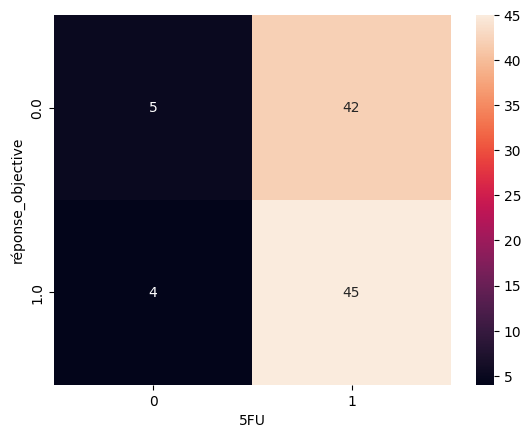

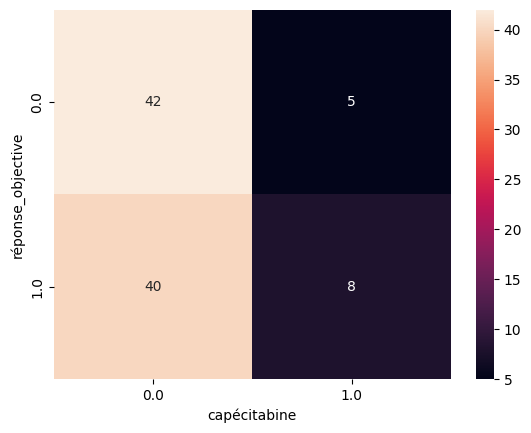

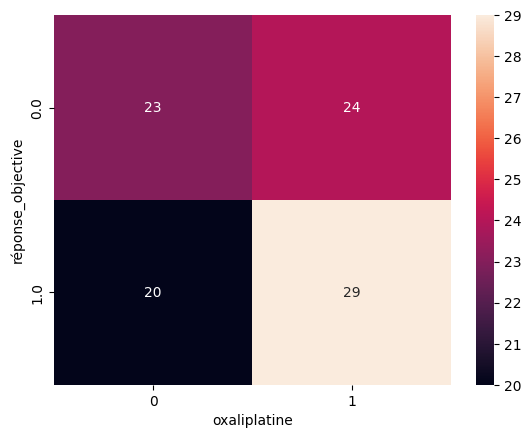

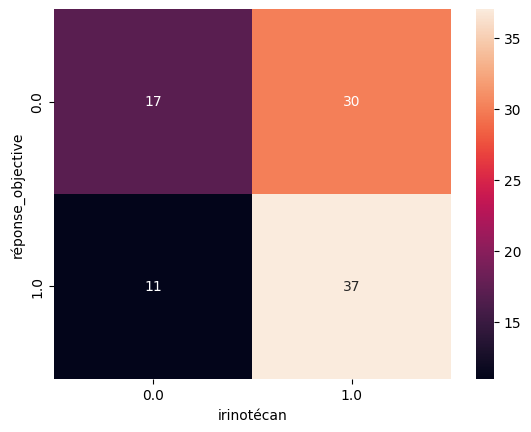

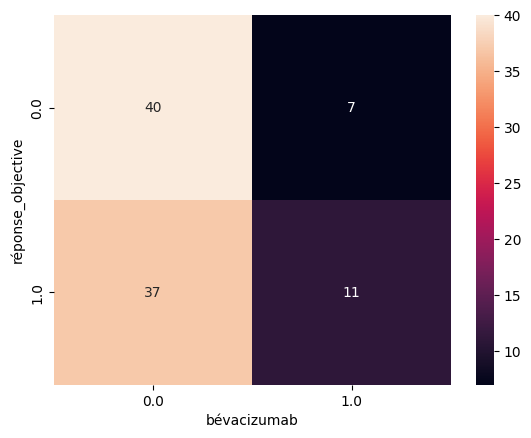

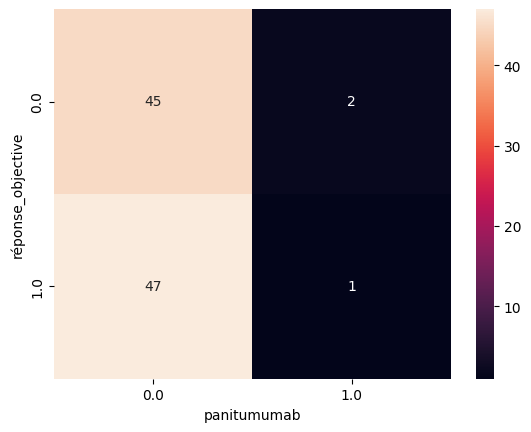

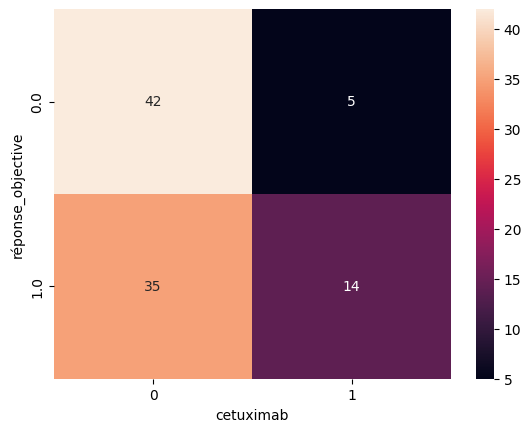

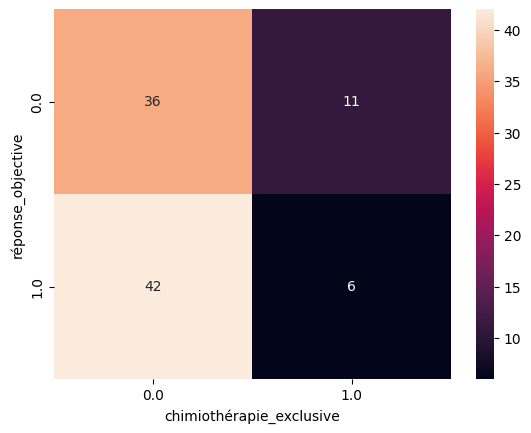

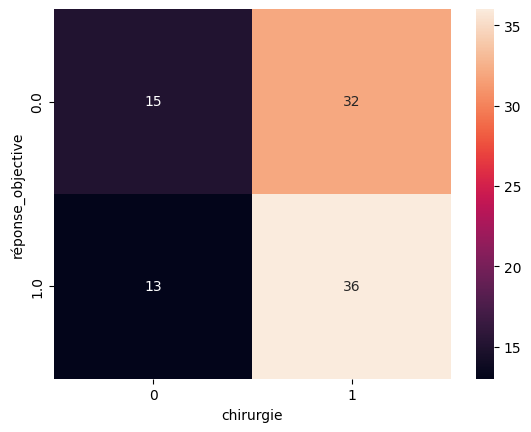

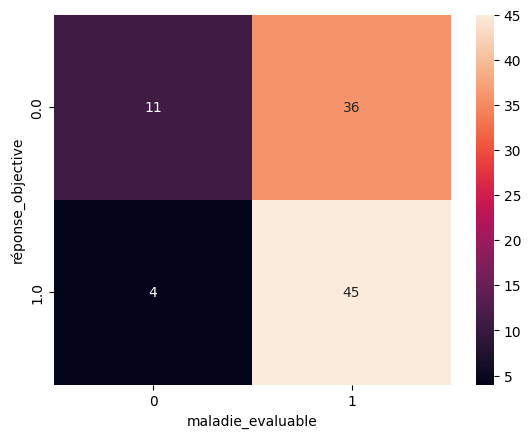

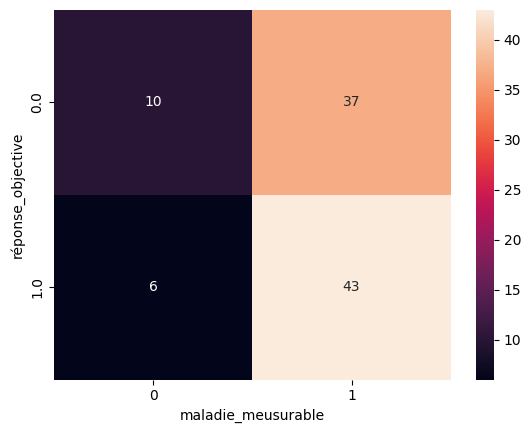

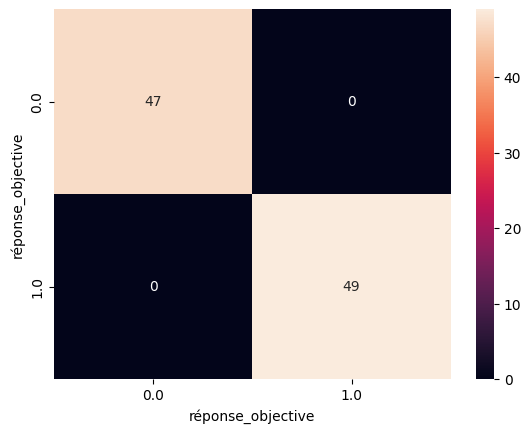

In [ ]:
for col in binary_categorical_features:
    plt.figure()
    sns.heatmap(pd.crosstab(df['réponse_objective'], df[col]), annot=True, fmt='d')

## A slightly more advanced analysis

### Inter-variable relationships


#### relations / continuous variables

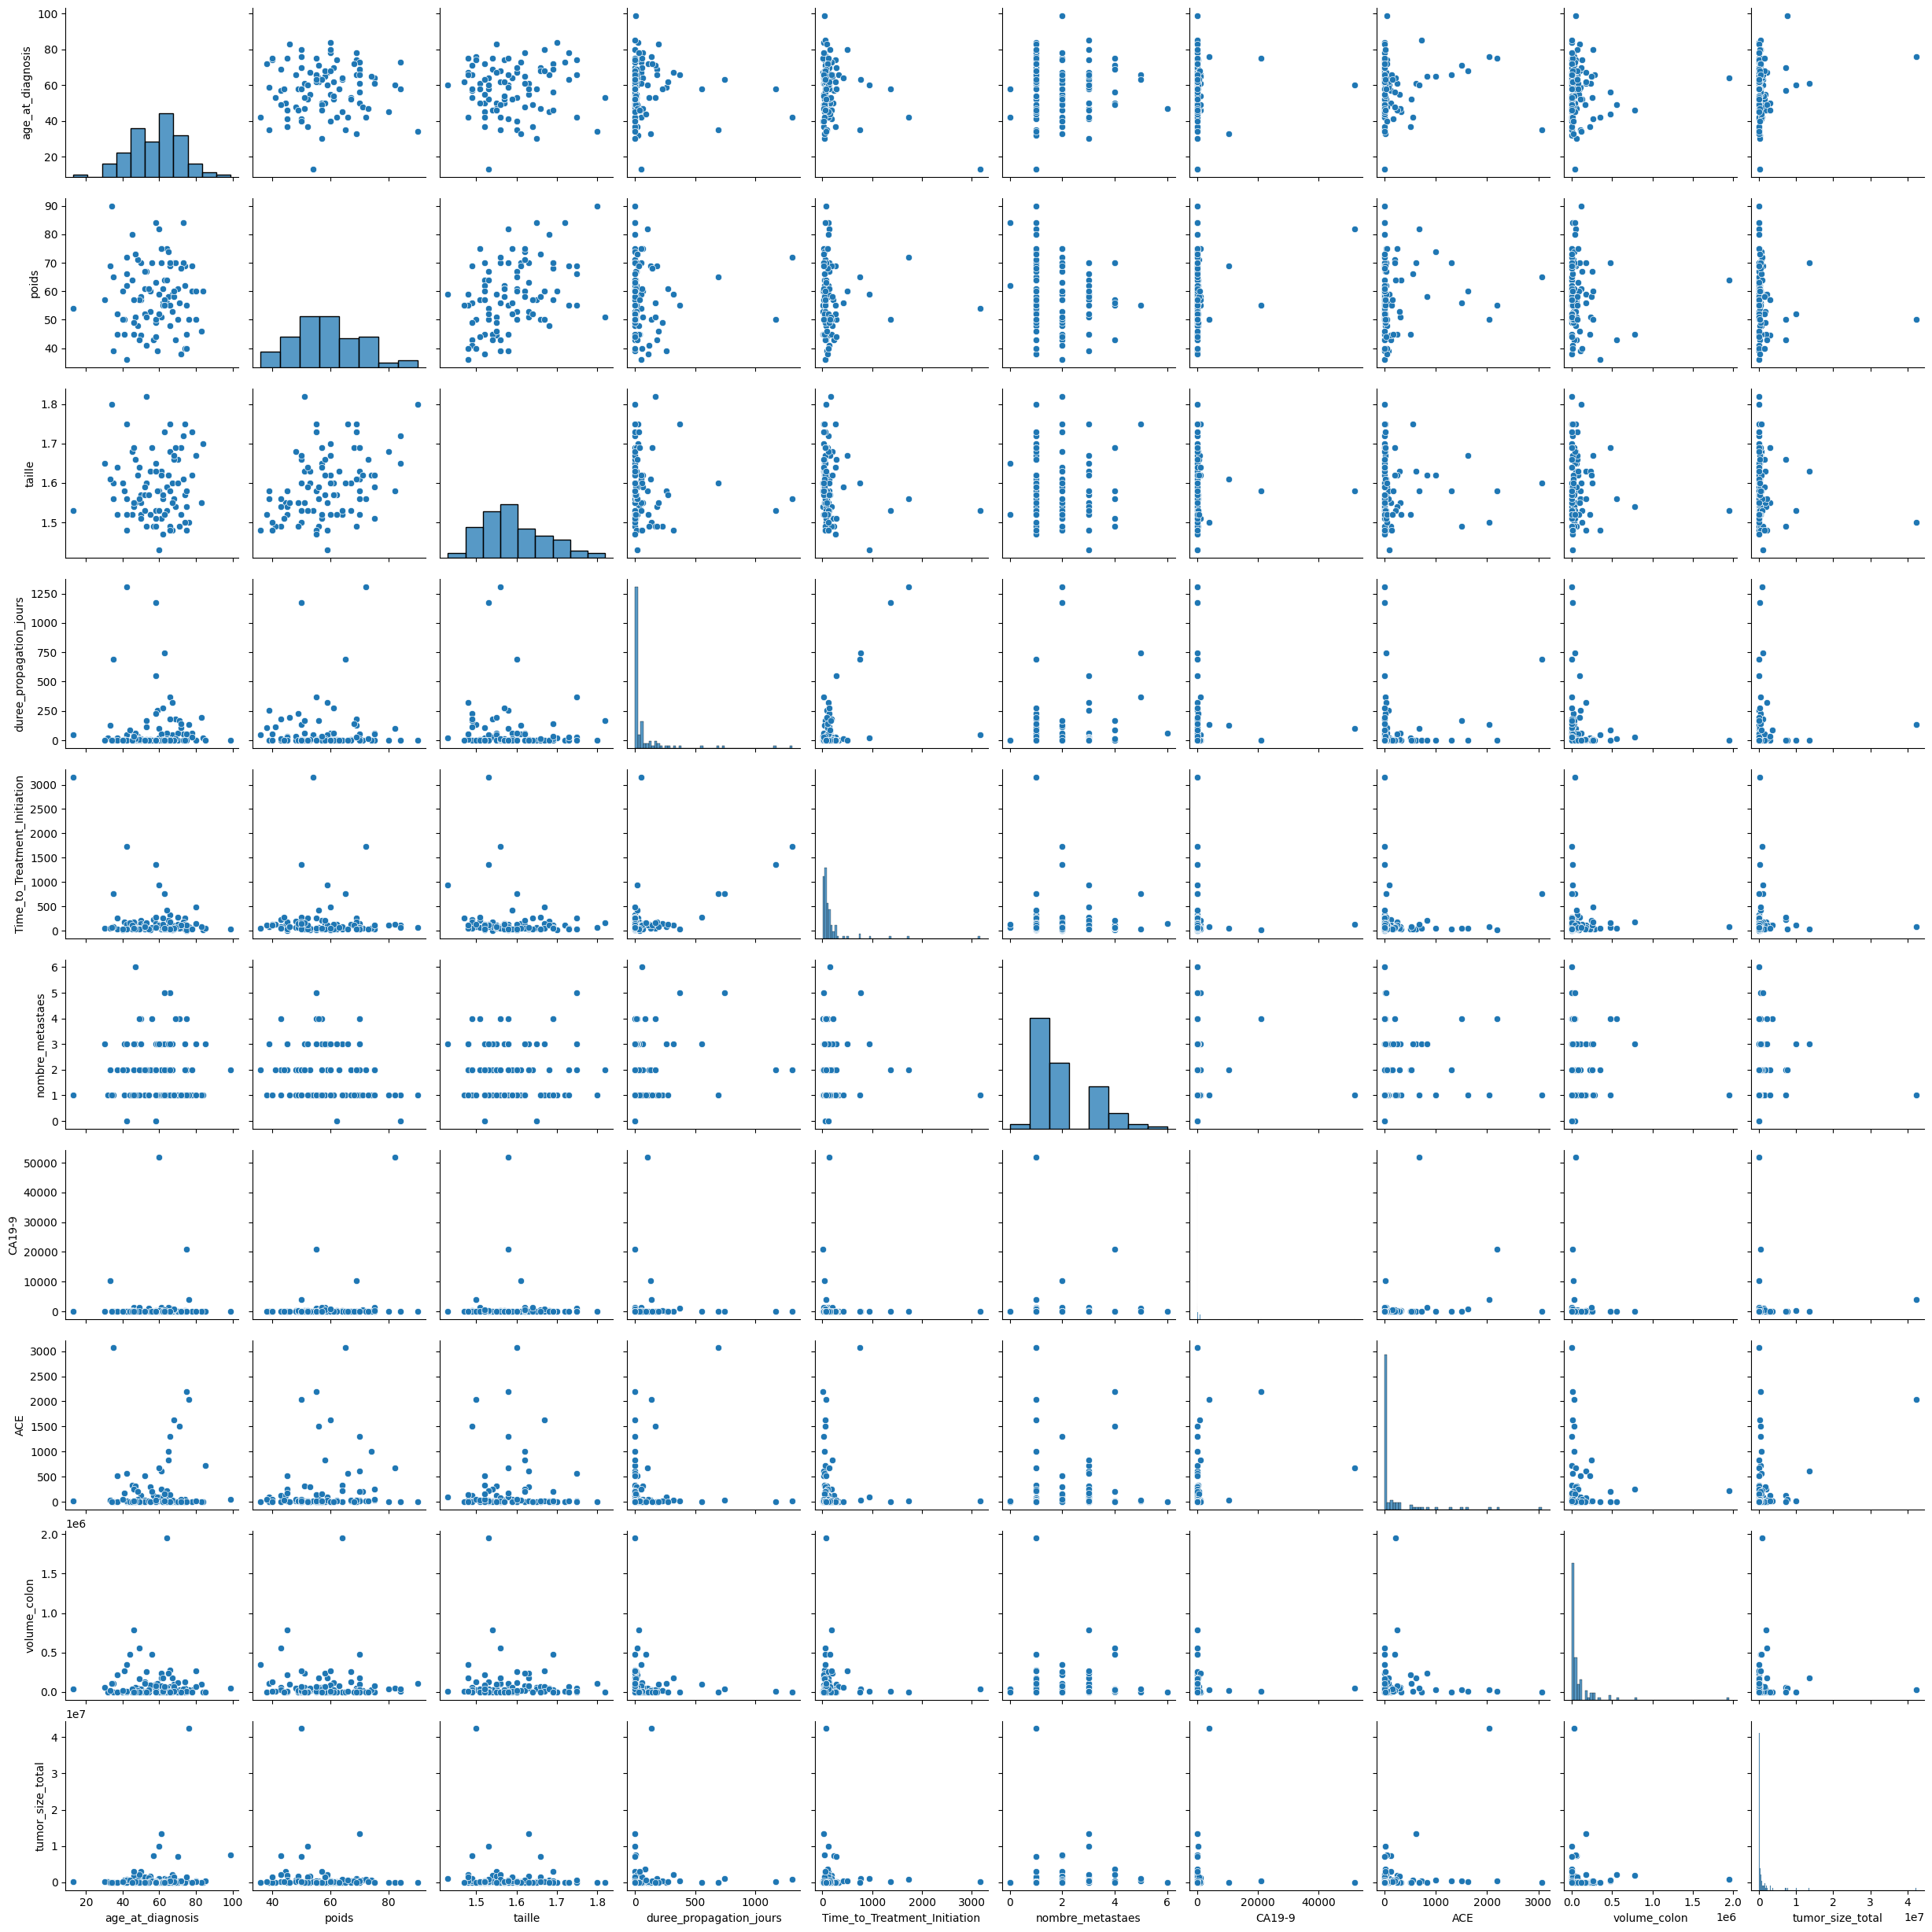

In [ ]:
sns.pairplot(df[numerical_features])

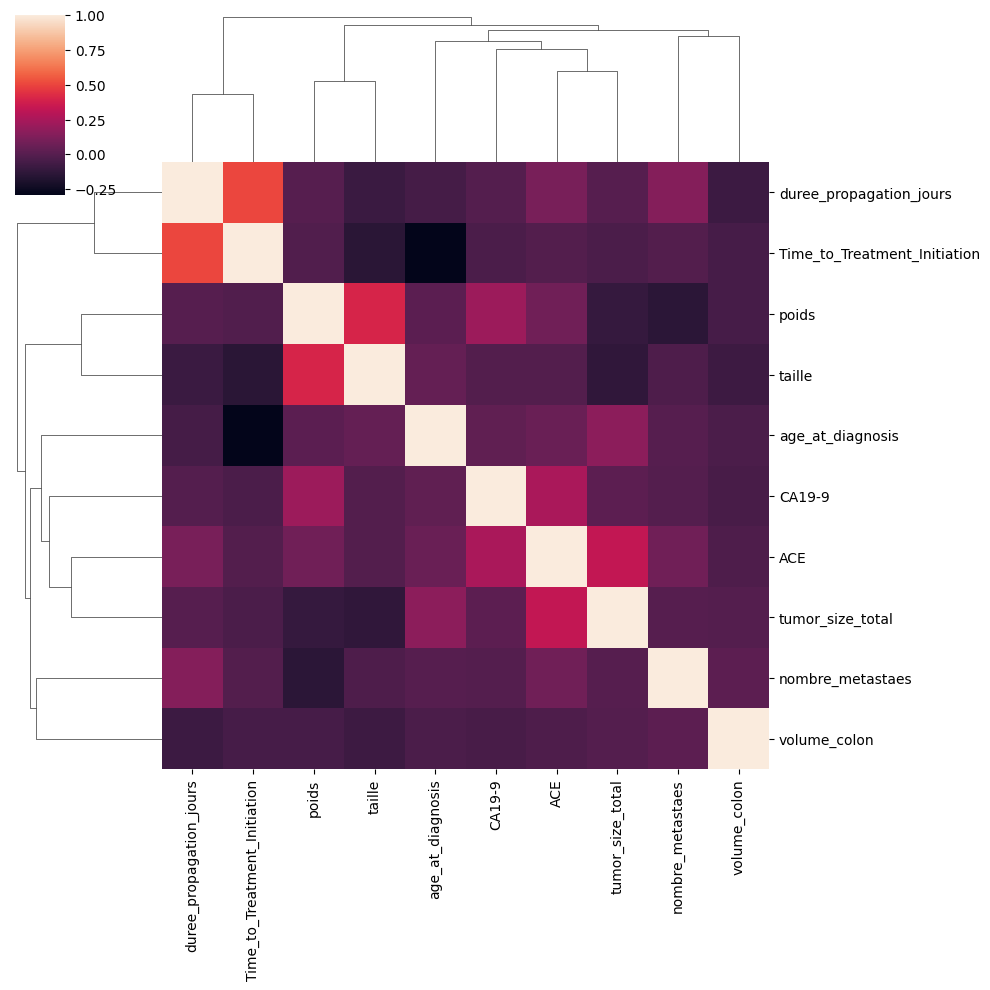

In [ ]:
sns.clustermap(df[numerical_features].corr())

# Data Preprocessing

In [ ]:
df.shape


(114, 47)

In [ ]:
df.columns

Index(['age_at_diagnosis', 'duree_propagation_jours',
       'Time_to_Treatment_Initiation', 'genre', 'antécédents_Familiaux',
       'type_histologique', 'sous_type_histologique', 'tabac',
       'grade_histologique', 'tumeur_primitive', 'poids', 'taille', 'PS',
       'RAS', 'BRAF', 'CA19-9', 'ACE', 'volume_colon', 'sites_métastatiques',
       'nombre_metastaes', '5FU', 'capécitabine', 'oxaliplatine', 'irinotécan',
       'bévacizumab', 'panitumumab', 'cetuximab', 'chimiothérapie_exclusive',
       'chirurgie', 'maladie_evaluable', 'maladie_meusurable',
       'réponse_objective', 'E1_date', 'E1_res', 'E2_date', 'E2_res',
       'E3_date', 'E3_res', 'E4_date', 'E4_res', 'date_dernier_ vue', 'Statut',
       'tumor_size_total', 'organ_status', 'diff_E1_E2', 'diff_E2_E3',
       'diff_E3_E4'],
      dtype='object')

In [ ]:
df.isna().sum()

age_at_diagnosis                 1
duree_propagation_jours          0
Time_to_Treatment_Initiation     1
genre                            0
antécédents_Familiaux            0
type_histologique                7
sous_type_histologique           0
tabac                            0
grade_histologique              13
tumeur_primitive                 0
poids                           15
taille                          17
PS                              12
RAS                              0
BRAF                             0
CA19-9                          14
ACE                             14
volume_colon                     0
sites_métastatiques              4
nombre_metastaes                 3
5FU                              0
capécitabine                     1
oxaliplatine                     0
irinotécan                       1
bévacizumab                      1
panitumumab                      1
cetuximab                        0
chimiothérapie_exclusive         1
chirurgie                        0
maladie_evaluable                0
maladie_meusurable               0
réponse_objective               18
E1_date                         26
E1_res                          26
E2_date                         47
E2_res                          47
E3_date                         67
E3_res                          67
E4_date                         79
E4_res                          79
date_dernier_ vue                4
Statut                           1
tumor_size_total                 0
organ_status                     0
diff_E1_E2                      47
diff_E2_E3                      67
diff_E3_E4                      79
dtype: int64

## Feature Selection / Engineering

In [ ]:
# Columns where all values are the same
no_variation = [col for col in df.columns if df[col].nunique() == 1]

print("Columns with no variation:")
print(no_variation)


Columns with no variation:
[]


In [ ]:
low_variation = []

for col in df.columns:
    top_freq = df[col].value_counts(normalize=True).values[0]
    if top_freq > 0.95:
        low_variation.append(col)

print("Columns with low variation:")
print(low_variation)


Columns with low variation:
['type_histologique', 'panitumumab']


In [ ]:
df['panitumumab'].value_counts()

panitumumab
0.0    109
1.0      4
Name: count, dtype: int64

In [ ]:
df = df.drop('type_histologique', axis=1)


In [ ]:
from sklearn.feature_selection import VarianceThreshold


numeric_df = df.select_dtypes(include=['int64', 'float64'])


selector = VarianceThreshold(threshold=0.0)
selector.fit(numeric_df)

zero_variance = numeric_df.columns[~selector.get_support()]
print("Numeric features with zero variance:")
print(zero_variance)


Numeric features with zero variance:
Index([], dtype='object')


##Train-Test Split

In [ ]:
df = df[df['réponse_objective'].notna()].copy()


In [ ]:
X = df.drop('réponse_objective', axis=1)
y = df['réponse_objective']

In [ ]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(num_cols)
cat_cols = X.select_dtypes(include='object').columns.tolist()
print(cat_cols)

['age_at_diagnosis', 'duree_propagation_jours', 'Time_to_Treatment_Initiation', 'antécédents_Familiaux', 'tabac', 'poids', 'taille', 'PS', 'CA19-9', 'ACE', 'volume_colon', 'nombre_metastaes', '5FU', 'capécitabine', 'oxaliplatine', 'irinotécan', 'bévacizumab', 'panitumumab', 'cetuximab', 'chimiothérapie_exclusive', 'chirurgie', 'maladie_evaluable', 'maladie_meusurable', 'tumor_size_total', 'diff_E1_E2', 'diff_E2_E3', 'diff_E3_E4', 'site_pelivien', 'site_reins', 'site_pancréas', 'site_foie', 'site_ovaires', 'site_ovaire', 'site_péritoine', 'site_pelvienne', 'site_adp', 'site_prostate', 'site_estomac', 'site_thyroide', 'site_pelvien', 'site_oumon', 'site_rectum', 'site_poumons', 'site_os', 'site_rate', 'site_poncréas', 'site_gg', 'site_abdomine', 'site_péritoinerate', 'site_sein', 'site_thorax', 'site_poumon']
['genre', 'sous_type_histologique', 'grade_histologique', 'tumeur_primitive', 'RAS', 'BRAF', 'sites_métastatiques', 'E1_res', 'E2_res', 'E3_res', 'E4_res', 'Statut', 'organ_status']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


##Cleaning

## preprocessing pipeline

In [ ]:
categorical_columns = df.select_dtypes(include='object').columns.tolist()
print(categorical_columns)

['genre', 'sous_type_histologique', 'grade_histologique', 'tumeur_primitive', 'RAS', 'BRAF', 'sites_métastatiques', 'E1_res', 'E2_res', 'E3_res', 'E4_res', 'Statut', 'organ_status']


In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



In [ ]:
df.columns

Index(['age_at_diagnosis', 'duree_propagation_jours',
       'Time_to_Treatment_Initiation', 'genre', 'antécédents_Familiaux',
       'sous_type_histologique', 'tabac', 'grade_histologique',
       'tumeur_primitive', 'poids', 'taille', 'PS', 'RAS', 'BRAF', 'CA19-9',
       'ACE', 'volume_colon', 'sites_métastatiques', 'nombre_metastaes', '5FU',
       'capécitabine', 'oxaliplatine', 'irinotécan', 'bévacizumab',
       'panitumumab', 'cetuximab', 'chimiothérapie_exclusive', 'chirurgie',
       'maladie_evaluable', 'maladie_meusurable', 'réponse_objective',
       'E1_date', 'E1_res', 'E2_date', 'E2_res', 'E3_date', 'E3_res',
       'E4_date', 'E4_res', 'date_dernier_ vue', 'Statut', 'tumor_size_total',
       'organ_status', 'diff_E1_E2', 'diff_E2_E3', 'diff_E3_E4',
       'site_pelivien', 'site_reins', 'site_pancréas', 'site_foie',
       'site_ovaires', 'site_ovaire', 'site_péritoine', 'site_pelvienne',
       'site_adp', 'site_prostate', 'site_estomac', 'site_thyroide',
       'site

⏬Numerical Pipeline with KNN and Scaling

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

class OutlierCapper(BaseEstimator, TransformerMixin):
    def __init__(self, factor=1.5):
        self.factor = factor
        self.bounds = {}

    def fit(self, X, y=None):
        X = pd.DataFrame(X)
        for col in X.columns:
            Q1 = X[col].quantile(0.25)
            Q3 = X[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - self.factor * IQR
            upper = Q3 + self.factor * IQR
            self.bounds[col] = (lower, upper)
        return self

    def transform(self, X):
        X = pd.DataFrame(X)
        for col in X.columns:
            lower, upper = self.bounds[col]
            X[col] = X[col].clip(lower=lower, upper=upper)
        return X


In [ ]:
num_pipeline = Pipeline(steps=[
    ('outlier_capper', OutlierCapper(factor=1.5)),
    ('knn_imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())])

⏬Categorical Pipeline

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

cat_pipeline = Pipeline(steps=[
    ('ordinal_encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
    ('knn_imputer', KNNImputer(n_neighbors=5)),
    ('onehot_encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)])

In [ ]:
X_train_clean = preprocessor.fit_transform(X_train)
X_test_clean = preprocessor.transform(X_test)

In [ ]:
pd.DataFrame(X_train_clean).to_csv("X_train00.csv", index=False)
pd.DataFrame(X_test_clean).to_csv("X_test00.csv", index=False)
y_train.to_csv("y_train00.csv", index=False)
y_test.to_csv("y_test00.csv", index=False)

In [ ]:
df.to_excel('finalSet.xlsx')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import KNNImputer

# ⬅️ À adapter : listes de colonnes numériques et catégorielles
# num_cols = [ ... ]  # liste des colonnes numériques
# cat_cols = [ ... ]  # liste des colonnes catégorielles

# ⚙️ Fonction pour extraire les noms de colonnes finales
def get_feature_names(preprocessor, num_cols, cat_cols):
    output_cols = []

    # Colonnes numériques
    output_cols.extend(num_cols)

    # Colonnes catégorielles encodées (via OneHotEncoder)
    cat_features = preprocessor.named_transformers_['cat']
    onehot = cat_features.named_steps['onehot_encoder']
    output_cols.extend(onehot.get_feature_names_out(cat_cols))

    return output_cols

# ⚙️ Après fit_transform et transform
X_train_clean_np = preprocessor.fit_transform(X_train)
X_test_clean_np = preprocessor.transform(X_test)

# 🏷️ Récupération des noms de colonnes
final_feature_names = get_feature_names(preprocessor, num_cols, cat_cols)

# 📄 Conversion en DataFrame lisible
X_train_clean = pd.DataFrame(X_train_clean_np, columns=final_feature_names, index=X_train.index)
X_test_clean = pd.DataFrame(X_test_clean_np, columns=final_feature_names, index=X_test.index)


In [ ]:
X_train_clean

age_at_diagnosis  duree_propagation_jours  Time_to_Treatment_Initiation  \
89           1.098616                 0.930277                      0.108991   
79          -0.082596                -0.741628                     -0.519724   
30           1.267361                -0.599673                     -0.902420   
25          -0.082596                 1.959445                      2.340246   
109         -1.179436                -0.741628                      0.177330   
27           0.339266                 1.959445                      2.340246   
40          -0.757575                -0.646992                      1.571437   
105          0.761127                -0.741628                     -0.697404   
1            1.604850                 0.220506                     -0.765743   
14          -0.926319                -0.236902                     -0.465053   
91           0.254893                -0.741628                      2.282158   
18          -0.386336                 0.599051                      0.122659   
84          -1.432553                -0.741628                     -0.916088   
97           1.098616                 1.450776                      0.081656   
74          -0.588830                -0.741628                     -0.465053   
31          -1.095064                -0.268447                      1.065731   
67           0.254893                -0.631219                     -0.560727   
85          -0.251341                -0.741628                     -0.560727   
0            2.111084                -0.410401                     -1.052765   
52           0.676755                 1.959445                      0.177330   
95          -0.841947                -0.741628                     -0.957091   
47           0.929872                -0.741628                      2.340246   
29           0.170521                -0.741628                     -0.478721   
107          0.592382                -0.741628                     -0.957091   
22          -1.010691                 0.252052                     -0.191699   
39          -1.095064                -0.741628                     -0.574395   
16          -1.010691                 0.173188                      0.683035   
90           0.339266                -0.694310                     -0.861417   
13          -0.757575                -0.741628                      0.232001   
48           0.001776                 1.959445                     -0.150696   
21           0.170521                -0.694310                     -0.916088   
4            1.436106                 1.371913                     -0.301040   
77           0.086149                -0.741628                      0.177330   
104          1.773595                -0.741628                      0.587361   
43          -0.504458                 1.103777                      0.450684   
98          -0.504458                 1.876639                      0.888051   
8            1.182989                -0.741628                      0.286671   
102          0.761127                -0.741628                     -0.834081   
55           1.014244                 1.860866                     -0.615398   
76          -0.420085                -0.741628                     -0.588063   
5            0.592382                 1.959445                     -0.957091   
94           1.351733                 0.141643                      0.232001   
103         -0.588830                -0.741628                     -0.342044   
75           0.592382                -0.599673                     -0.656401   
71           0.592382                 1.959445                      1.120402   
106         -1.010691                -0.520810                     -0.984426   
65          -0.082596                 1.959445                      2.340246   
58           0.929872                 0.188961                      0.491687   
96          -1.601298                -0.741628                     -0.957091   
23   

In [ ]:
df['sites_métastatiques'].unique()

array(['péritoine', 'foie', 'gg', 'rectum. prostate. gg',
       'foie. gg. thorax. abdomine. pelvienne', 'foie. gg',
       'foie. gg. abdomine.', 'foie. reins', 'foie. rectum', 'foie. adp',
       'foie. péritoine rate. poumons. abdomine. ovaire',
       'foie.adp.rectum', 'foie. rate. adp. péritoine', 'foie.adp.os',
       'foie. pancréas', 'foie.ovaire', 'thorax.pelvien.foie',
       'foie. thorax. gg', 'foie.ovaire.gg.os.poumons', 'foie. rectum.',
       'foie. thorax. adp', 'foie. ovaire. pelivien', 'poumons',
       'gg.foie.poumons', 'foie. thorax', 'foie.adp.poumons',
       'foie. ovaire', 'rectum.foie.poumons.os', 'foie. poumon',
       'foie. adp. poumon', 'foie.poumons', 'foie. thorax.poumons.gg',
       'péritoine.gg.poumon', 'péritoine.foie.rectum',
       'rectum.foie.thyroide.rate', 'foie.péritoine', 'foie.poumon.gg',
       'rectum.poumon', 'foie.gg.poumon.péritoine', 'poncréas',
       'sein.ovaire.foie', 'foie. poumon. gg', nan, 'péritoine.foie',
       'foie. ovair

In [ ]:
import pandas as pd
import numpy as np

# Étape 1 : Remplacer les NaN par des chaînes vides
df['sites_métastatiques'] = df['sites_métastatiques'].fillna('')

# Étape 2 : Séparer par '.' et nettoyer les noms
df['sites_métastatiques_list'] = df['sites_métastatiques'].str.lower().str.replace(' ', '').str.split('.')

# Étape 3 : Extraire tous les sites uniques
sites_uniques = set()
for liste in df['sites_métastatiques_list']:
    sites_uniques.update(liste)

# Supprimer les chaînes vides
sites_uniques.discard('')

# Étape 4 : Créer les colonnes dummies
for site in sites_uniques:
    df[f'site_{site}'] = df['sites_métastatiques_list'].apply(lambda x: int(site in x))

# Facultatif : Supprimer la colonne intermédiaire
df.drop(columns=['sites_métastatiques_list'], inplace=True)


In [ ]:
df

age_at_diagnosis  duree_propagation_jours  Time_to_Treatment_Initiation  \
0                84.0                       21                          24.0   
1                78.0                       61                          45.0   
2                67.0                        0                          13.0   
3                75.0                       35                           2.0   
4                76.0                      134                          79.0   
5                66.0                      368                          31.0   
6                66.0                        0                         200.0   
7                61.0                        0                          29.0   
8                73.0                        0                         122.0   
9                74.0                       24                         258.0   
10               73.0                       52                         140.0   
12               57.0                        0                         226.0   
13               50.0                        0                         118.0   
14               48.0                       32                          67.0   
15               46.0                       47                         119.0   
16               47.0                       58                         151.0   
17               85.0                        0                          51.0   
18                NaN                       85                         110.0   
19               45.0                        0                          37.0   
20               60.0                      100                         138.0   
21               61.0                        3                          34.0   
22               47.0                       63                          87.0   
23               68.0                        2                          64.0   
24               32.0                       22                           NaN   
25               58.0                      553                         274.0   
26               63.0                        2                          35.0   
27               63.0                      745                         766.0   
28               37.0                       18                          28.0   
29               61.0                        0                          66.0   
30               74.0                        9                          35.0   
31               46.0                       30                         179.0   
32               69.0                      179                          78.0   
33               66.0                        0                         318.0   
34               99.0                        1                          38.0   
35               60.0                       18                         945.0   
36               53.0                        8                         116.0   
37               67.0                       50                          43.0   
38               50.0                        0                          55.0   
39               46.0                        0                          59.0   
40               50.0                        6                         216.0   
41               42.0                       48                          51.0   
42               50.0                       12                         152.0   
43               53.0                      117                         134.0   
44               64.0                       61                          28.0   
45               75.0                        0                          16.0   
47               70.0                        0                         279.0   
48               59.0                      258                          90.0   
51               58.0                      225                         141.0   
52               67.0                      321                         114.0   
55   